In [1]:
print('Jupyter notebook for "quick" SAXS data processing!')
print('')
print('Basic System Info:')
# print('Total atom count for 3A12:', int(36651))
# print('Expected Rg from crystal structure:', float(54.63),'angstroms - as determined by FoxS')
# print('Data collection:', 'Batch SAXS at CHESS ID7A')
print('Processing Scripts/Classes: BasicSAXS.py, PlotClass.py, SAXSCalcs.py can all be found at: \nhttps://github.com/Mill6159/SAXS_Analysis_Code')




Jupyter notebook for "quick" SAXS data processing!

Basic System Info:
Processing Scripts/Classes: BasicSAXS.py, PlotClass.py, SAXSCalcs.py can all be found at: 
https://github.com/Mill6159/SAXS_Analysis_Code
Jupyter notebook for "quick" SAXS data processing!

Basic System Info:
Processing Scripts/Classes: BasicSAXS.py, PlotClass.py, SAXSCalcs.py can all be found at: 
https://github.com/Mill6159/SAXS_Analysis_Code


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Module Imports
from PlotClass import *
from Basic_SAXS_Calcs import *
from SAXS_Calcs import *
from FileParser import *
import numpy as np
import pickle
import os
import subprocess
import re
from itertools import islice

In [4]:
file_prefix='dat_files/'
cmd = 'ls dat_files/*.dat'
proc = subprocess.Popen([cmd], stdout=subprocess.PIPE, shell=True)
(out, err) = proc.communicate()

print('The following .dat files were found in the /dat_files directory:\n')
print(str(out.decode('ascii')))

lst = []
for char in out.decode():
    lst.append(char)
    
fileList=''.join(lst).split('\n')[:-1]

tmp_data = FileParser(notify=False) # most of my classes will 'notify' you once they have been called
dat_files = tmp_data.load_datFiles(fileList=fileList)

fileList=[s.strip('dat_files/') for s in fileList] # cleaning up fileList for naming downstream

The following .dat files were found in the /dat_files directory:

dat_files/S_A_16uM_tkRubisCO_01569_1_data_000001.dat
dat_files/S_A_1uM_tkRubisCO_01562_1_data_000001.dat
dat_files/S_A_2uM_tkRubisCO_01563_1_data_000001.dat
dat_files/S_A_4uM_tkRubisCO_01564_1_data_000001.dat
dat_files/S_A_8uM_tkRubisCO_01565_1_data_000001.dat

The following .dat files were found in the /dat_files directory:

dat_files/S_A_16uM_tkRubisCO_01569_1_data_000001.dat
dat_files/S_A_1uM_tkRubisCO_01562_1_data_000001.dat
dat_files/S_A_2uM_tkRubisCO_01563_1_data_000001.dat
dat_files/S_A_4uM_tkRubisCO_01564_1_data_000001.dat
dat_files/S_A_8uM_tkRubisCO_01565_1_data_000001.dat



In [5]:
#######################################################
# Calcs
# BasicSAXS will try to find the ATSAS directory
# BUT
# It is easier to just provide it if you know it.
#######################################################

calcs = BasicSAXS(atsas_dir='/Users/robmiller/ATSAS-3.0.1-1/bin',notify=False)
figs = PlotClass(notify=False)

print(fileList)

#######################
GNOM directory provided
#######################
--------------------------------------------------------------
['S_A_16uM_tkRubisCO_01569_1_data_000001.', 'S_A_1uM_tkRubisCO_01562_1_data_000001.', 'S_A_2uM_tkRubisCO_01563_1_data_000001.', 'S_A_4uM_tkRubisCO_01564_1_data_000001.', 'S_A_8uM_tkRubisCO_01565_1_data_000001.']
#######################
GNOM directory provided
#######################
--------------------------------------------------------------
['S_A_16uM_tkRubisCO_01569_1_data_000001.', 'S_A_1uM_tkRubisCO_01562_1_data_000001.', 'S_A_2uM_tkRubisCO_01563_1_data_000001.', 'S_A_4uM_tkRubisCO_01564_1_data_000001.', 'S_A_8uM_tkRubisCO_01565_1_data_000001.']


In [6]:
print('Flow of Analysis:')
print('1: AutoRg - If AutoRg fails you MUST run manual Rg')
print('2: Manual Rg (optional)')
print('3: Kratky plots')
print('4: DATGNOM')
print('5: GNOM (optional)')
print('6: Rg/I0 as a function of file number')
print('7: Crysol fits')
print('8: Basic data export')

Flow of Analysis:
1: AutoRg - If AutoRg fails you MUST run manual Rg
2: Manual Rg (optional)
3: Kratky plots
4: DATGNOM
5: GNOM (optional)
6: Rg/I0 as a function of file number
7: Crysol fits
8: Basic data export
Flow of Analysis:
1: AutoRg - If AutoRg fails you MUST run manual Rg
2: Manual Rg (optional)
3: Kratky plots
4: DATGNOM
5: GNOM (optional)
6: Rg/I0 as a function of file number
7: Crysol fits
8: Basic data export


In [7]:
print('Beginning AutoRg')

Beginning AutoRg
Beginning AutoRg


S_A_16uM_tkRubisCO_01569_1_data_000001. - Processing....
--------------------------------------------------------------------------
################################################################
AutoRg calculations beginning..
We will cutoff 0.00 points at the beginning of the profile
autoRg predicts the Rg to be: 60.31 +/- 0.23
with a Guiner region of (qminRg, qmaxRg): 0.54, 1.51
nmin,nmax:  0 73
S_A_16uM_tkRubisCO_01569_1_data_000001. - Processing....
--------------------------------------------------------------------------
################################################################
AutoRg calculations beginning..
We will cutoff 0.00 points at the beginning of the profile
autoRg predicts the Rg to be: 60.31 +/- 0.23
with a Guiner region of (qminRg, qmaxRg): 0.54, 1.51
nmin,nmax:  0 73


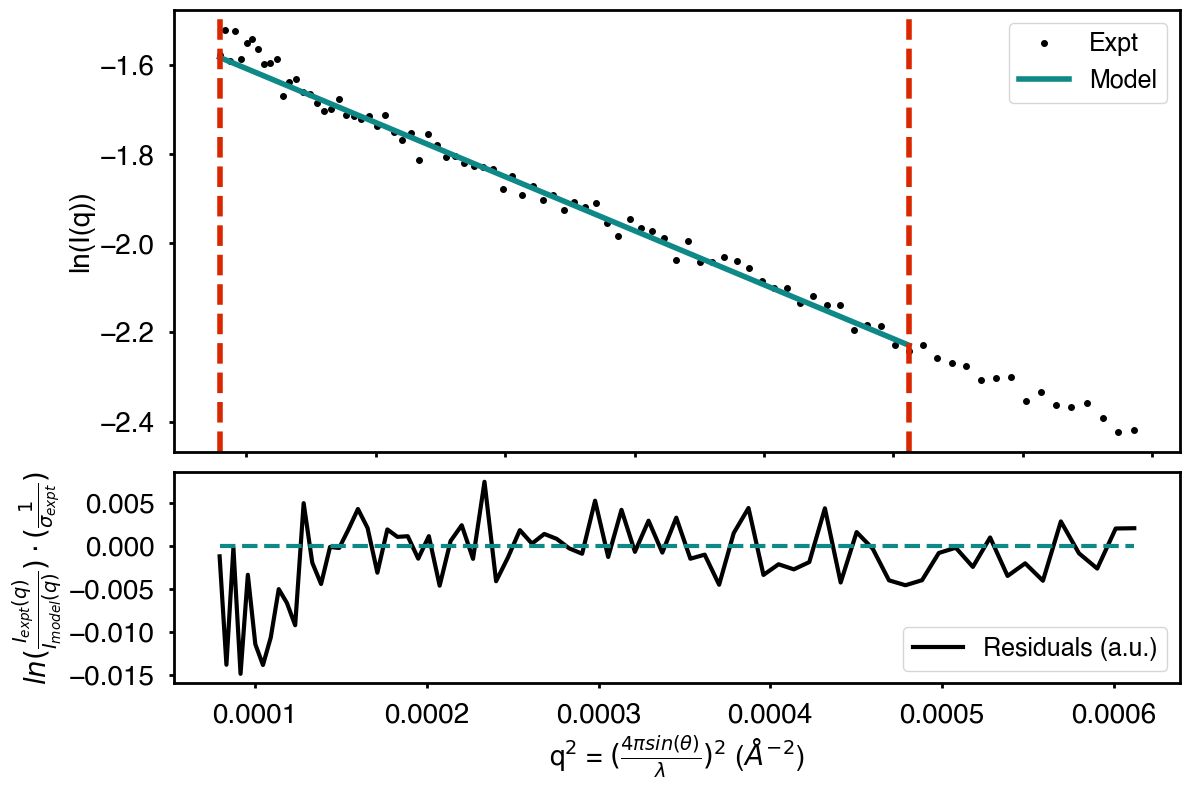

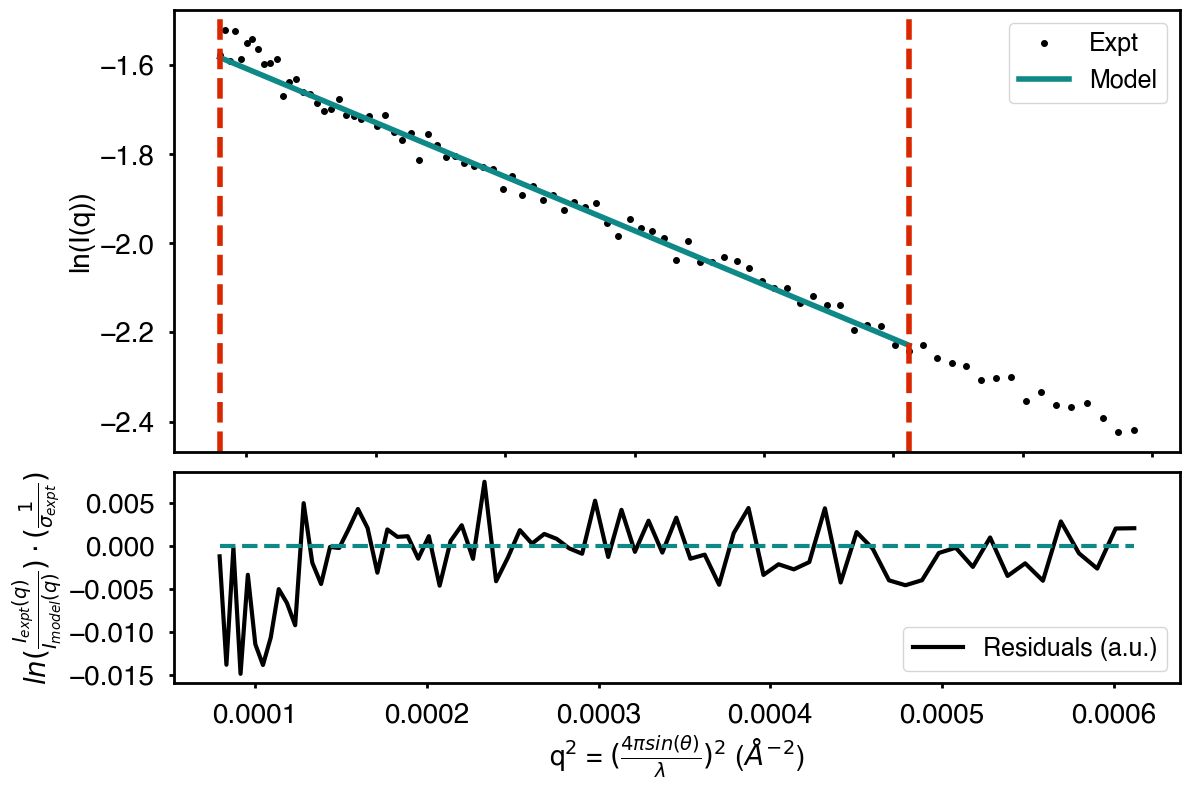

################################################################
--------------------------------------------------------------------------
S_A_1uM_tkRubisCO_01562_1_data_000001. - Processing....
--------------------------------------------------------------------------
################################################################
AutoRg calculations beginning..
We will cutoff 0.00 points at the beginning of the profile
autoRg predicts the Rg to be: 63.86 +/- 0.98
with a Guiner region of (qminRg, qmaxRg): 0.82, 1.54
nmin,nmax:  18 69
################################################################
--------------------------------------------------------------------------
S_A_1uM_tkRubisCO_01562_1_data_000001. - Processing....
--------------------------------------------------------------------------
################################################################
AutoRg calculations beginning..
We will cutoff 0.00 points at the beginning of the profile
autoRg predicts the Rg to be: 

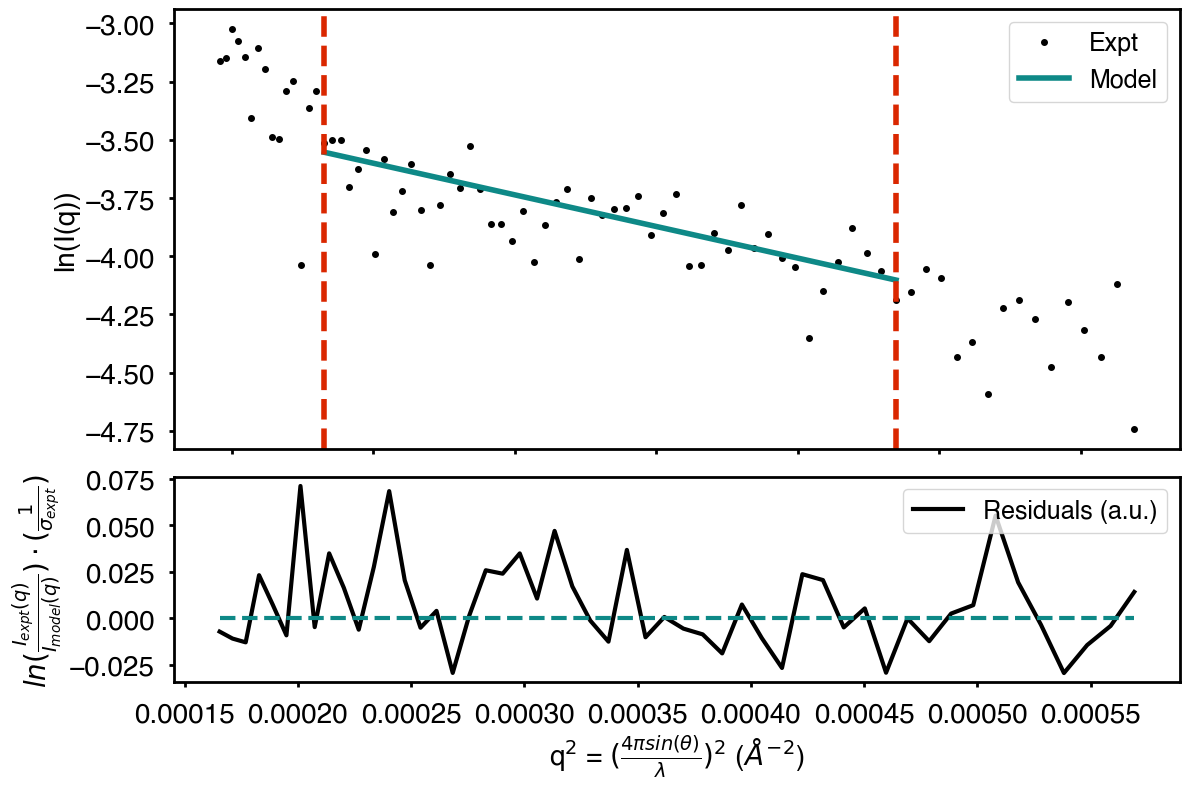

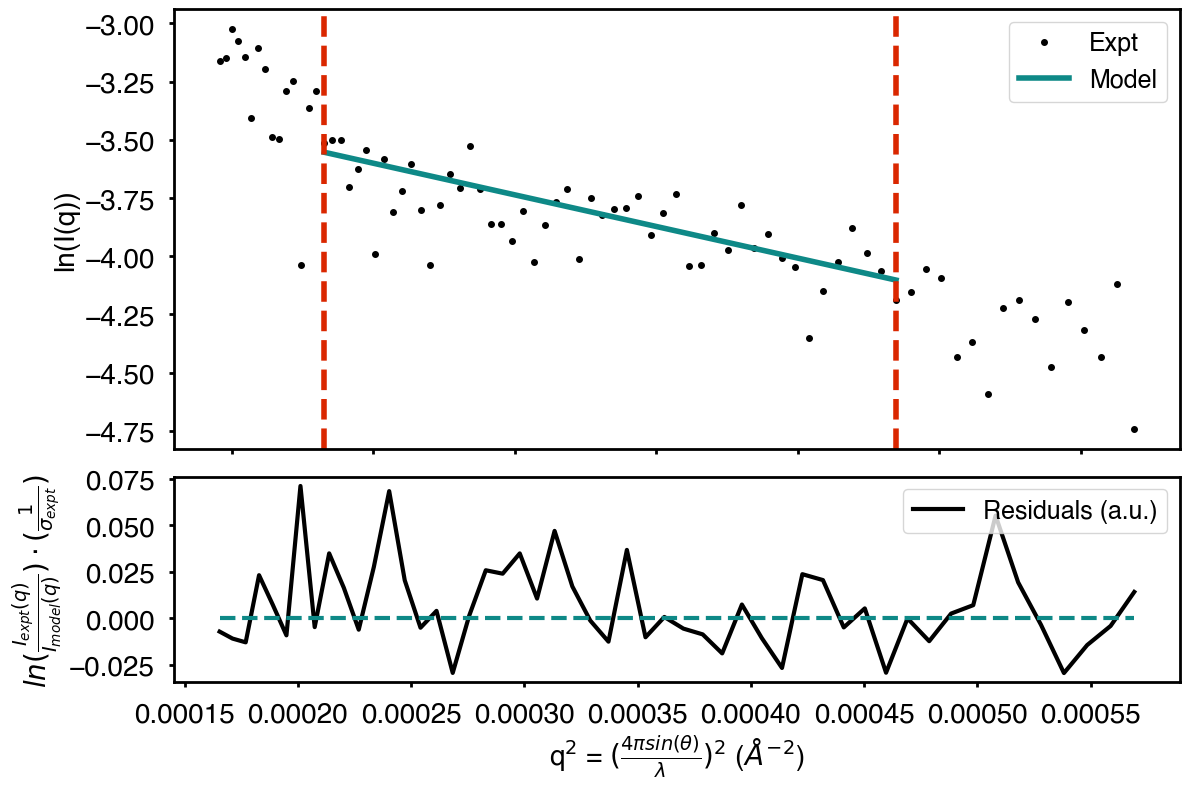

################################################################
--------------------------------------------------------------------------
S_A_2uM_tkRubisCO_01563_1_data_000001. - Processing....
--------------------------------------------------------------------------
################################################################
AutoRg calculations beginning..
We will cutoff 0.00 points at the beginning of the profile
autoRg predicts the Rg to be: 53.51 +/- 0.23
with a Guiner region of (qminRg, qmaxRg): 0.55, 1.54
nmin,nmax:  6 90
################################################################
--------------------------------------------------------------------------
S_A_2uM_tkRubisCO_01563_1_data_000001. - Processing....
--------------------------------------------------------------------------
################################################################
AutoRg calculations beginning..
We will cutoff 0.00 points at the beginning of the profile
autoRg predicts the Rg to be: 5

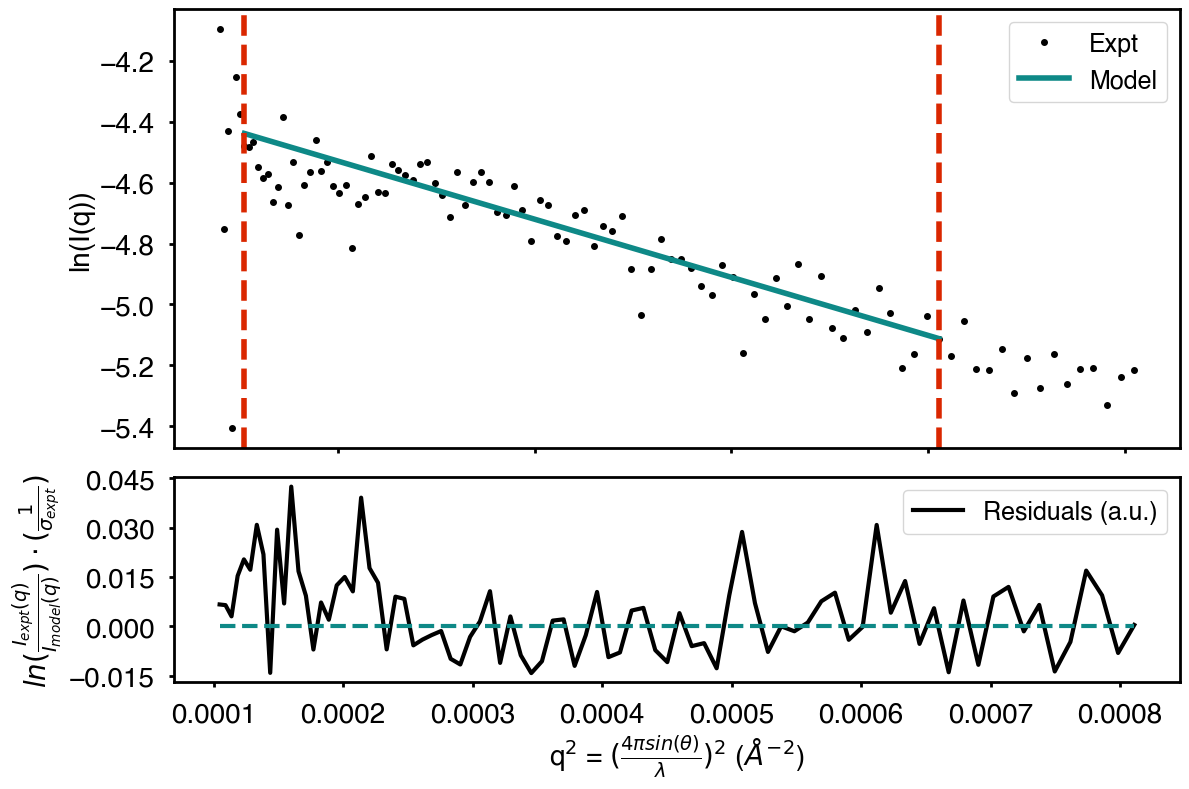

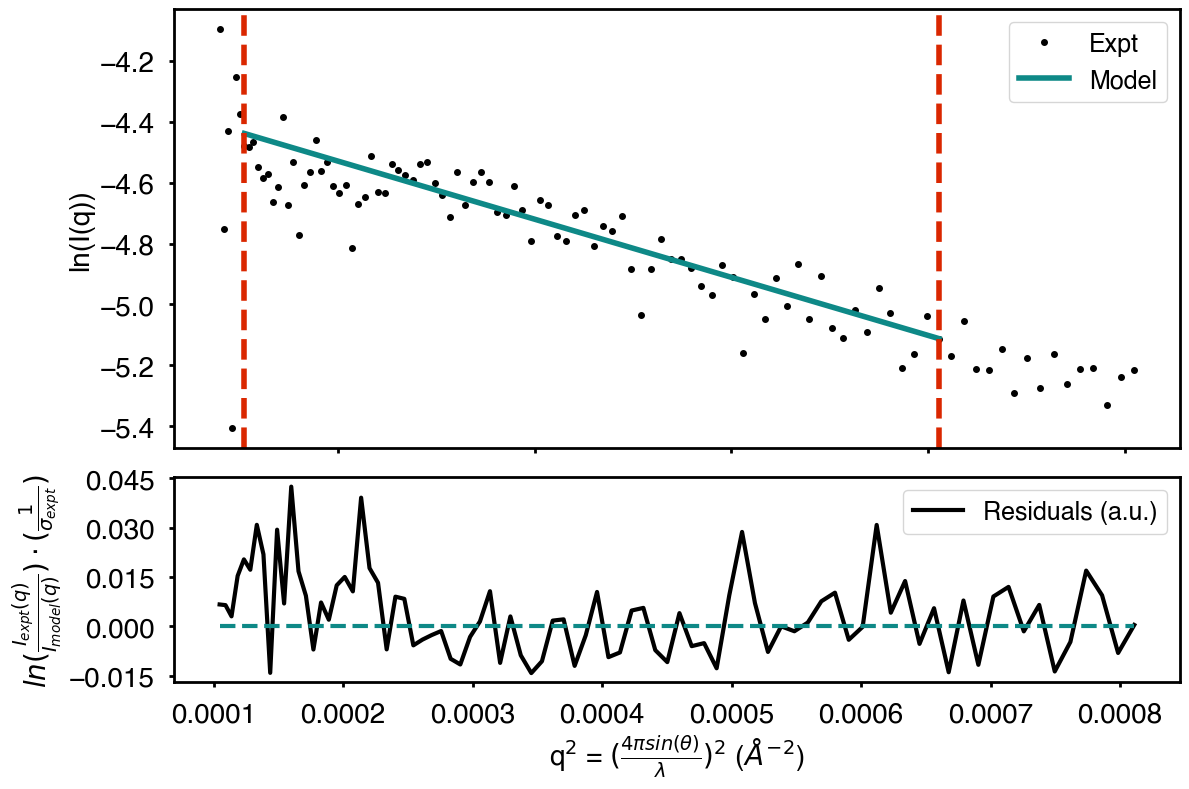

################################################################
--------------------------------------------------------------------------
S_A_4uM_tkRubisCO_01564_1_data_000001. - Processing....
--------------------------------------------------------------------------
################################################################
AutoRg calculations beginning..
We will cutoff 0.00 points at the beginning of the profile
autoRg predicts the Rg to be: 60.27 +/- 0.34
with a Guiner region of (qminRg, qmaxRg): 0.54, 1.50
nmin,nmax:  0 73
################################################################
--------------------------------------------------------------------------
S_A_4uM_tkRubisCO_01564_1_data_000001. - Processing....
--------------------------------------------------------------------------
################################################################
AutoRg calculations beginning..
We will cutoff 0.00 points at the beginning of the profile
autoRg predicts the Rg to be: 6

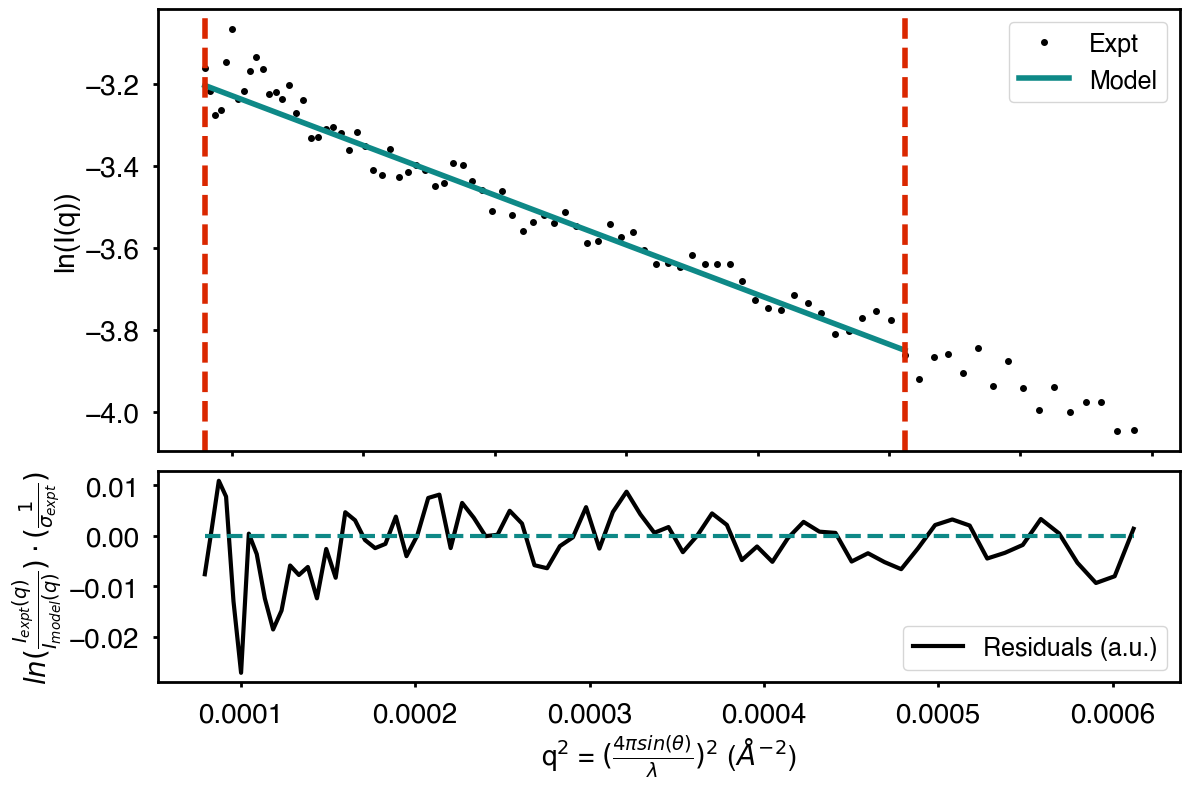

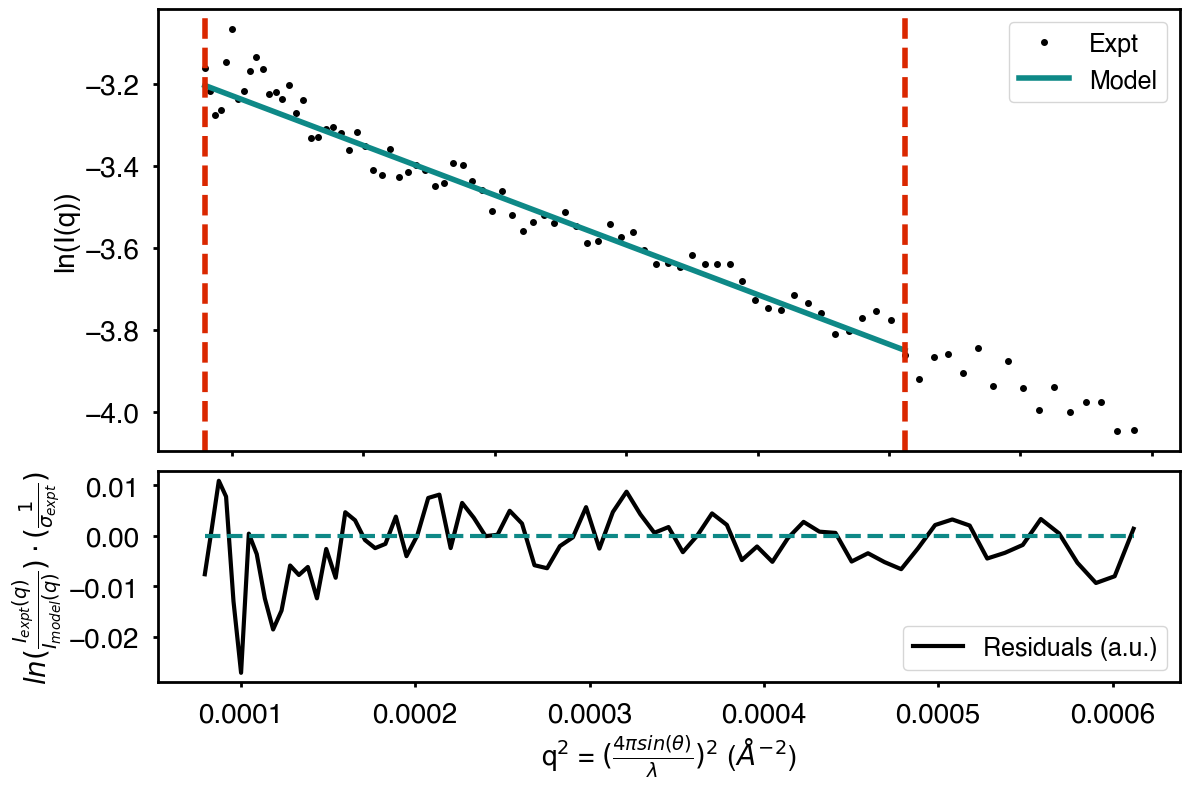

################################################################
--------------------------------------------------------------------------
S_A_8uM_tkRubisCO_01565_1_data_000001. - Processing....
--------------------------------------------------------------------------
################################################################
AutoRg calculations beginning..
We will cutoff 0.00 points at the beginning of the profile
autoRg predicts the Rg to be: 59.90 +/- 0.25
with a Guiner region of (qminRg, qmaxRg): 0.53, 1.50
nmin,nmax:  0 73
################################################################
--------------------------------------------------------------------------
S_A_8uM_tkRubisCO_01565_1_data_000001. - Processing....
--------------------------------------------------------------------------
################################################################
AutoRg calculations beginning..
We will cutoff 0.00 points at the beginning of the profile
autoRg predicts the Rg to be: 5

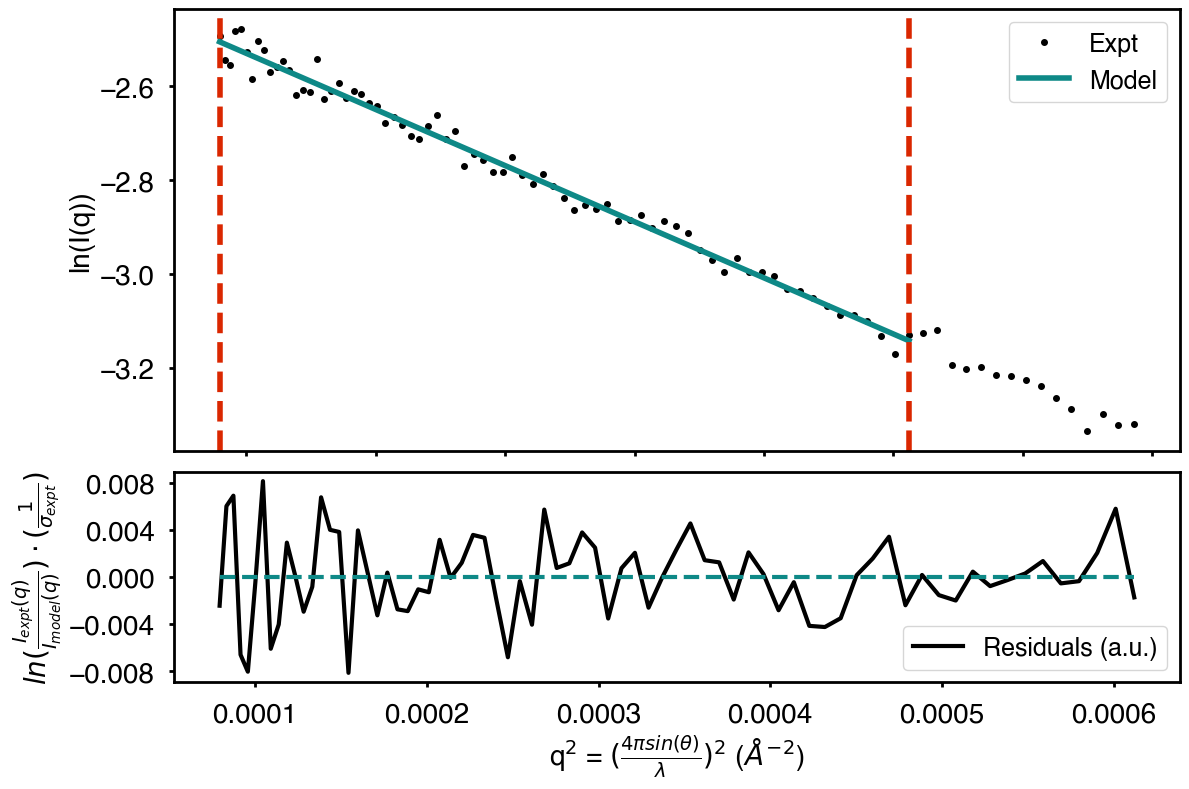

################################################################
--------------------------------------------------------------------------


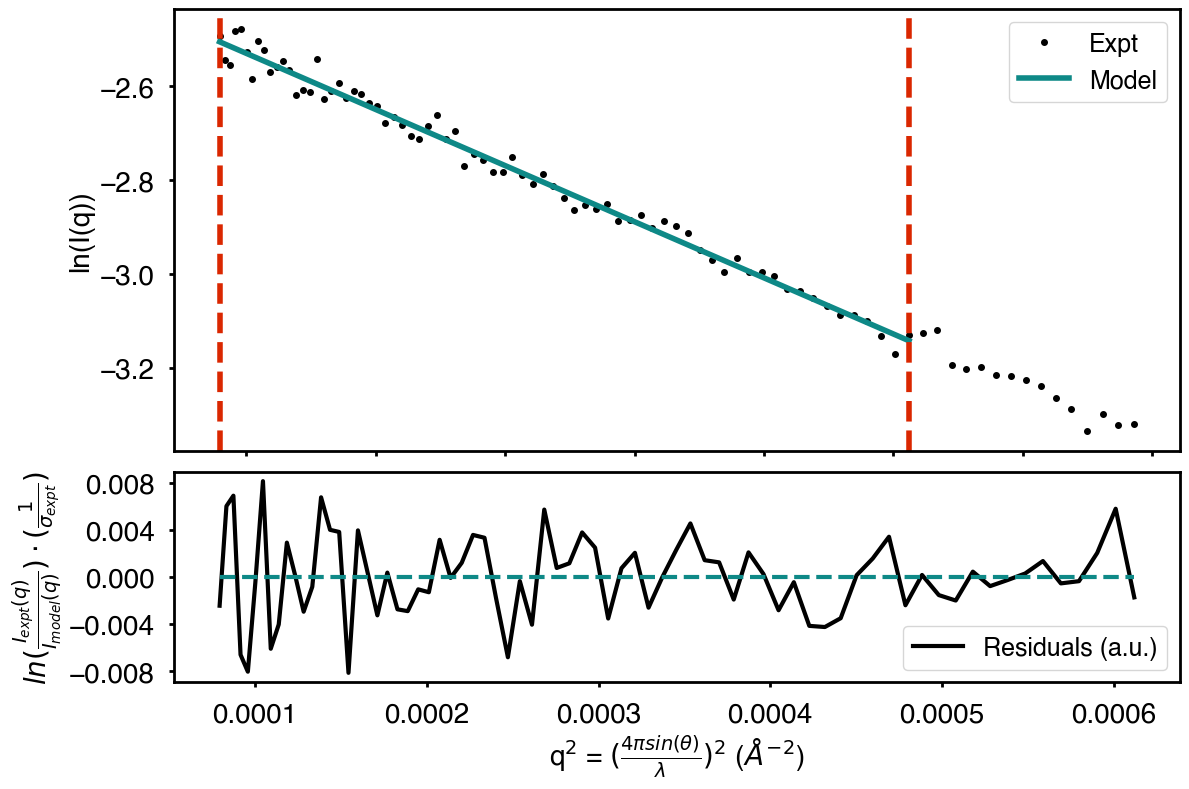

################################################################
--------------------------------------------------------------------------


In [8]:
#######################################################
# Guiner - AutoRg
#######################################################

auto_Guiner_diction={}

for i,j in zip(dat_files,fileList):
	print(j, '- Processing....')
	rg,rger,i0,i0er,idx_min,idx_max=calcs.autoRg(q=dat_files[str(i)]['Q'],i=dat_files[str(i)]['I(Q)'], 
		err=dat_files[str(i)]['ERROR'], lowQclip=0, saveLabel='%s_AutoRg'%str(j),plot=True)

	auto_Guiner_diction['%s_Rg'%str(j)]=rg
	auto_Guiner_diction['%s_Rg_Err'%str(j)]=rger
	auto_Guiner_diction['%s_I0'%str(j)]=i0
	auto_Guiner_diction['%s_I0_Err'%str(j)]=i0er
	auto_Guiner_diction['%s_idx_min'%str(j)]=idx_min
	auto_Guiner_diction['%s_idx_max'%str(j)]=idx_max

	del rg,rger,i0,i0er,idx_min,idx_max

In [9]:
print('Beginning Manual Calculations (Optional - Unless AutoRg failed..)')

Beginning Manual Calculations (Optional - Unless AutoRg failed..)
Beginning Manual Calculations (Optional - Unless AutoRg failed..)


# Manual Guiner Analysis

__Optional - Unless AutoRg failed....__

## Run Details

* The cell will ask for the following:
    * Guiner nmin (integer)
    * Guiner nmax (integer)
    * If the fit is acceptable?
        * If yes, it will clear the output on move on to the next data file.
        * If no, it will clear the output and try again with new nmin, nmax outputs!
        * __Do not worry, the final outputs are dumped in the current working directory__
        
        
_Currently working on building an inline plot that auto removes/updates as you supply new parameters_

################################################################
################################################################
Do you want to run a manual Guiner fit? (Default: N) y
Downstream analysis will use results from manual Guiner analysis!
###
S_A_16uM_tkRubisCO_01569_1_data_000001. Processing ....
Downstream analysis will use results from manual Guiner analysis!
###
S_A_16uM_tkRubisCO_01569_1_data_000001. Processing ....
Guiner nmin? 1
Guiner nmax? 56
--------------------------------------------------------------------------
Guiner Analysis:
The input file was: data_1_Manual_Guiner
The Rg is approximately 61.35 +/- 0.65Angstroms
The guiner range is approximately: (qminRg, qmaxRg) - 0.56, 1.30
--------------------------------------------------------------------------
Guiner Analysis:
The input file was: data_1_Manual_Guiner
The Rg is approximately 61.35 +/- 0.65Angstroms
The guiner range is approximately: (qminRg, qmaxRg) - 0.56, 1.30


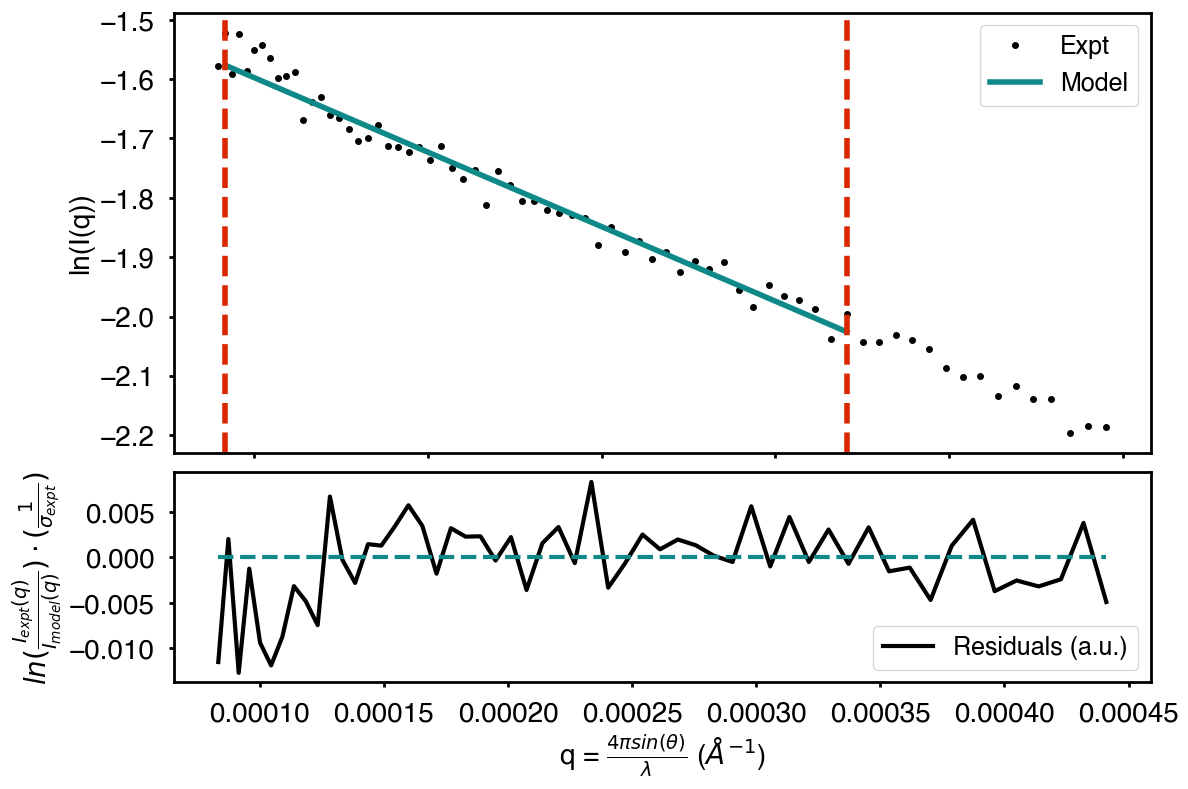

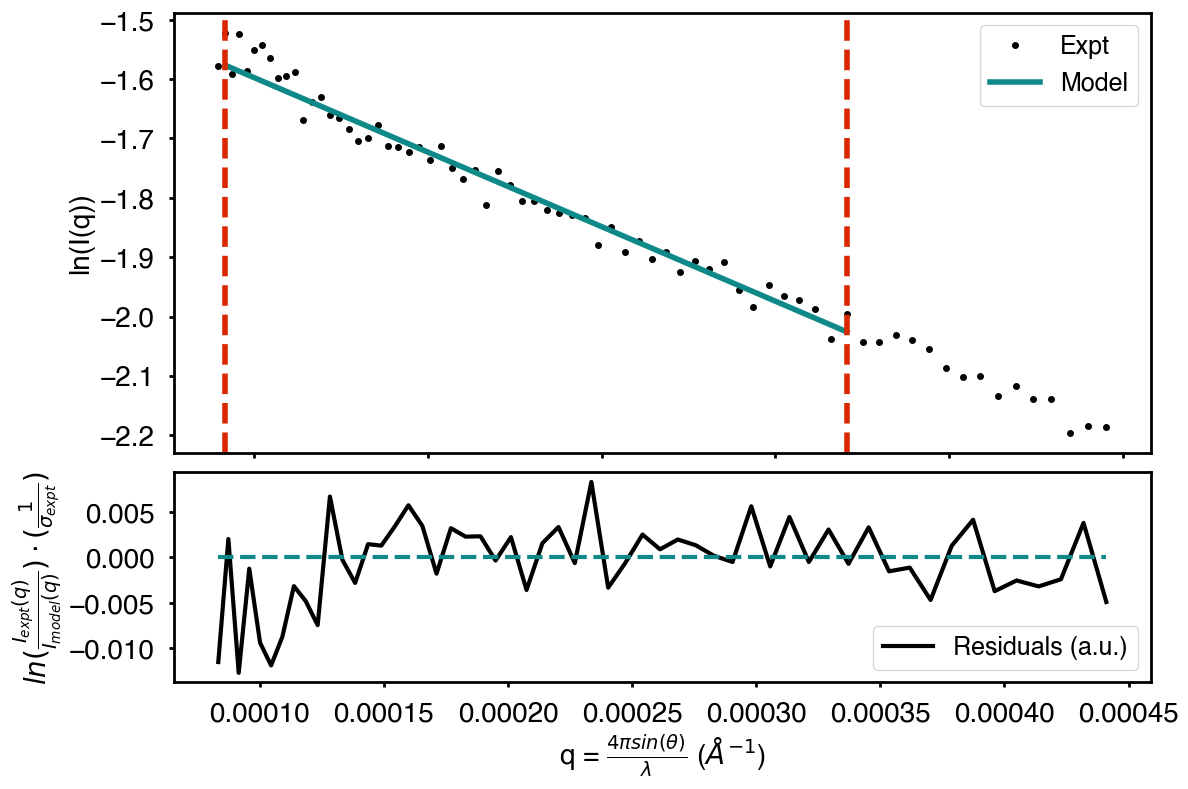

Acceptable fit? (Default: N)Y
###
S_A_1uM_tkRubisCO_01562_1_data_000001. Processing ....
###
S_A_1uM_tkRubisCO_01562_1_data_000001. Processing ....
Guiner nmin? 5
Guiner nmax? 15
--------------------------------------------------------------------------
Guiner Analysis:
The input file was: data_2_Manual_Guiner
The Rg is approximately 133.38 +/- 44.93Angstroms
The guiner range is approximately: (qminRg, qmaxRg) - 1.33, 1.63
--------------------------------------------------------------------------
Guiner Analysis:
The input file was: data_2_Manual_Guiner
The Rg is approximately 133.38 +/- 44.93Angstroms
The guiner range is approximately: (qminRg, qmaxRg) - 1.33, 1.63


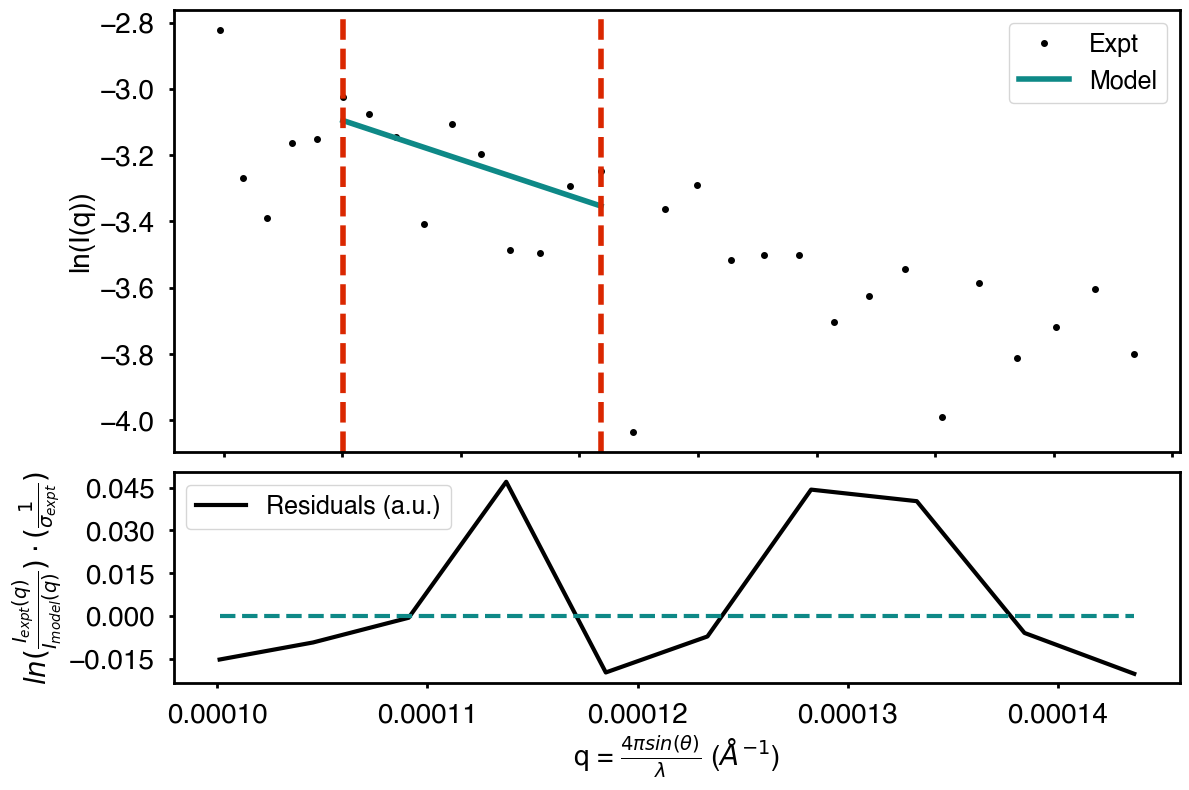

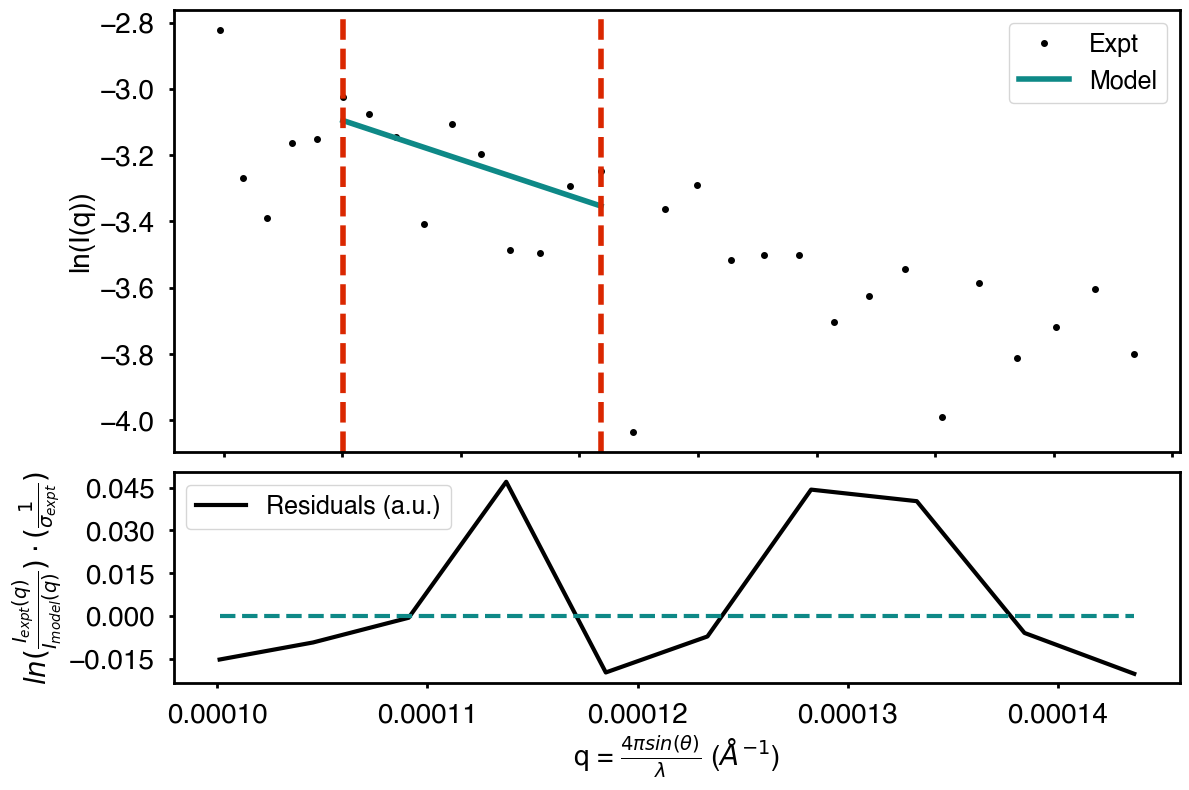

Acceptable fit? (Default: N)y
###
S_A_2uM_tkRubisCO_01563_1_data_000001. Processing ....
###
S_A_2uM_tkRubisCO_01563_1_data_000001. Processing ....
Guiner nmin? 5
Guiner nmax? 35
--------------------------------------------------------------------------
Guiner Analysis:
The input file was: data_3_Manual_Guiner
The Rg is approximately 36.56 +/- 17.66Angstroms
The guiner range is approximately: (qminRg, qmaxRg) - 0.37, 0.61
--------------------------------------------------------------------------
Guiner Analysis:
The input file was: data_3_Manual_Guiner
The Rg is approximately 36.56 +/- 17.66Angstroms
The guiner range is approximately: (qminRg, qmaxRg) - 0.37, 0.61


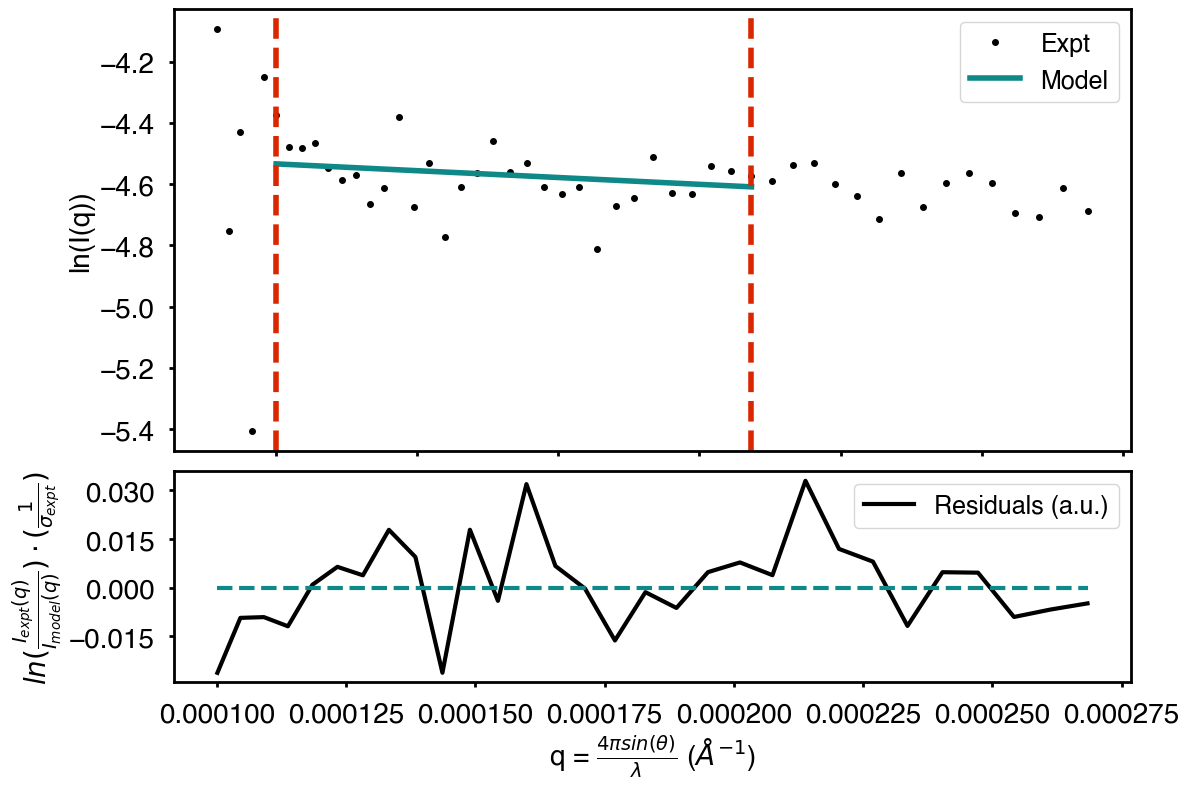

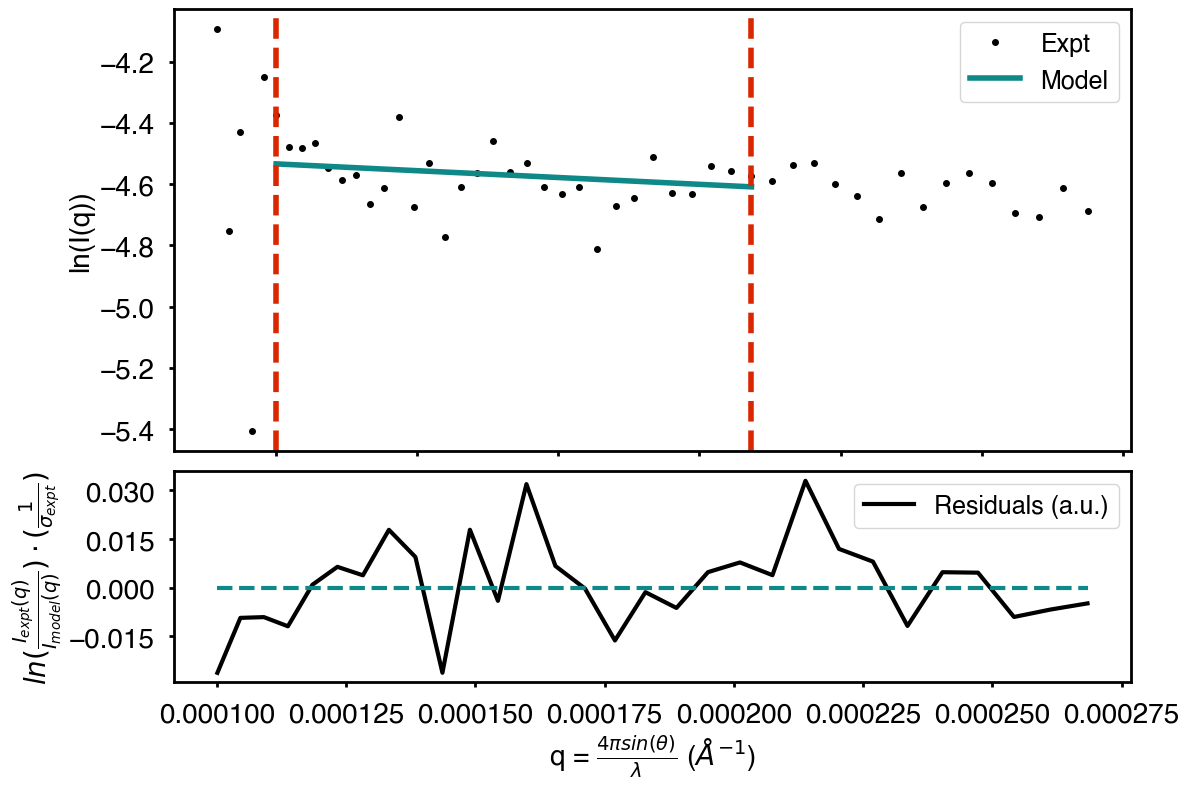

Acceptable fit? (Default: N)y
###
S_A_4uM_tkRubisCO_01564_1_data_000001. Processing ....
###
S_A_4uM_tkRubisCO_01564_1_data_000001. Processing ....
Guiner nmin? 1
Guiner nmax? 60
--------------------------------------------------------------------------
Guiner Analysis:
The input file was: data_4_Manual_Guiner
The Rg is approximately 61.07 +/- 0.98Angstroms
The guiner range is approximately: (qminRg, qmaxRg) - 0.56, 1.35
--------------------------------------------------------------------------
Guiner Analysis:
The input file was: data_4_Manual_Guiner
The Rg is approximately 61.07 +/- 0.98Angstroms
The guiner range is approximately: (qminRg, qmaxRg) - 0.56, 1.35


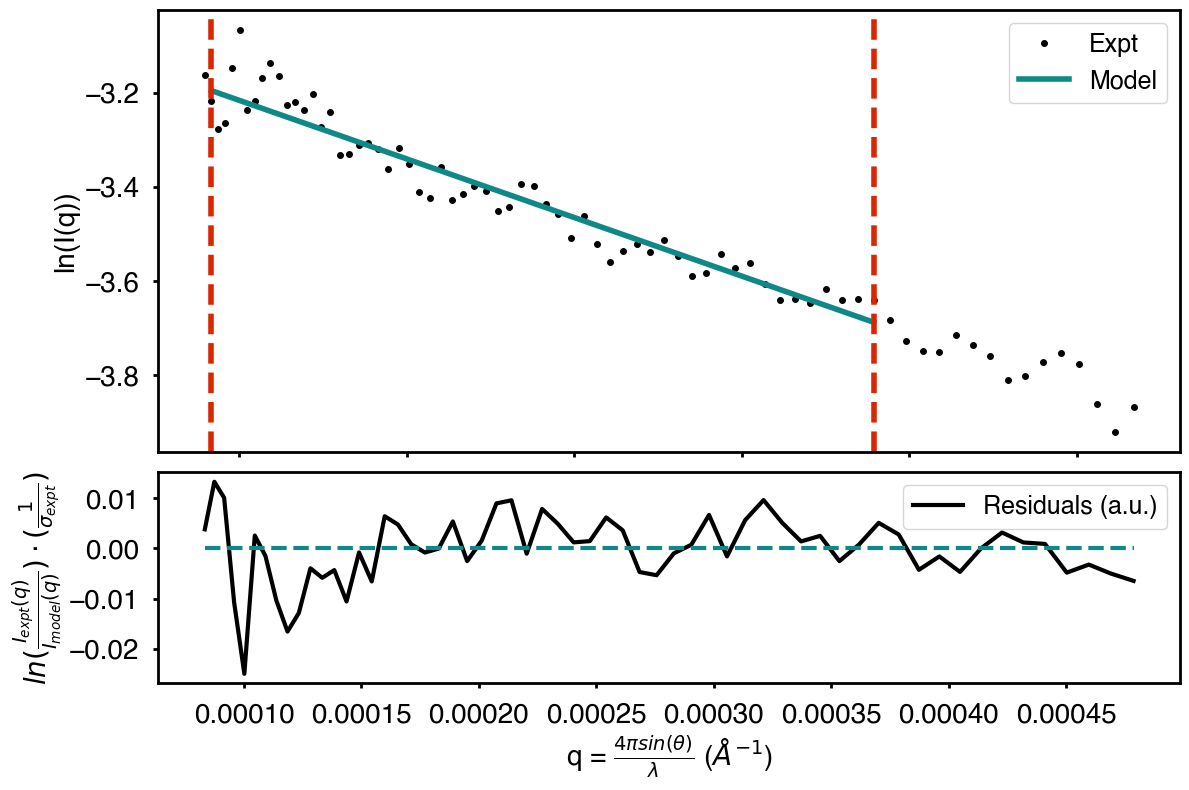

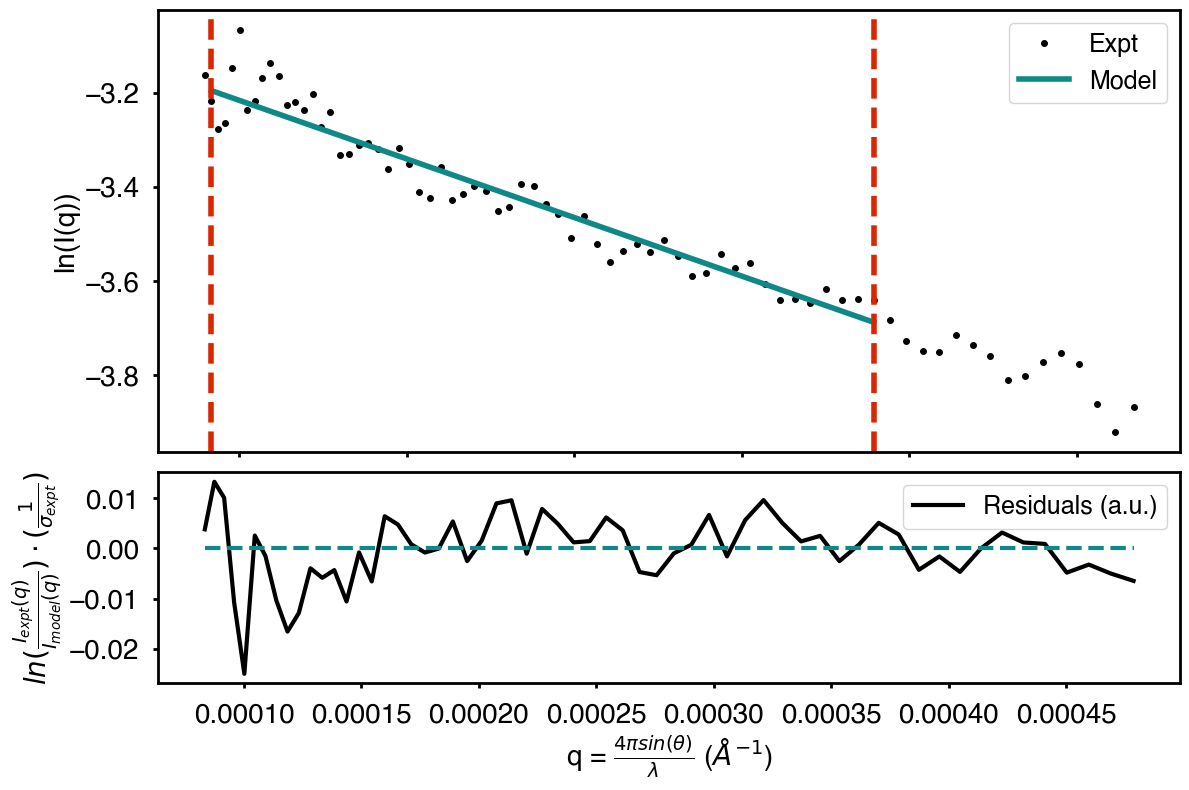

Acceptable fit? (Default: N)y
###
S_A_8uM_tkRubisCO_01565_1_data_000001. Processing ....
###
S_A_8uM_tkRubisCO_01565_1_data_000001. Processing ....
Guiner nmin? 1
Guiner nmax? 60
--------------------------------------------------------------------------
Guiner Analysis:
The input file was: data_5_Manual_Guiner
The Rg is approximately 59.67 +/- 0.60Angstroms
The guiner range is approximately: (qminRg, qmaxRg) - 0.54, 1.32
--------------------------------------------------------------------------
Guiner Analysis:
The input file was: data_5_Manual_Guiner
The Rg is approximately 59.67 +/- 0.60Angstroms
The guiner range is approximately: (qminRg, qmaxRg) - 0.54, 1.32


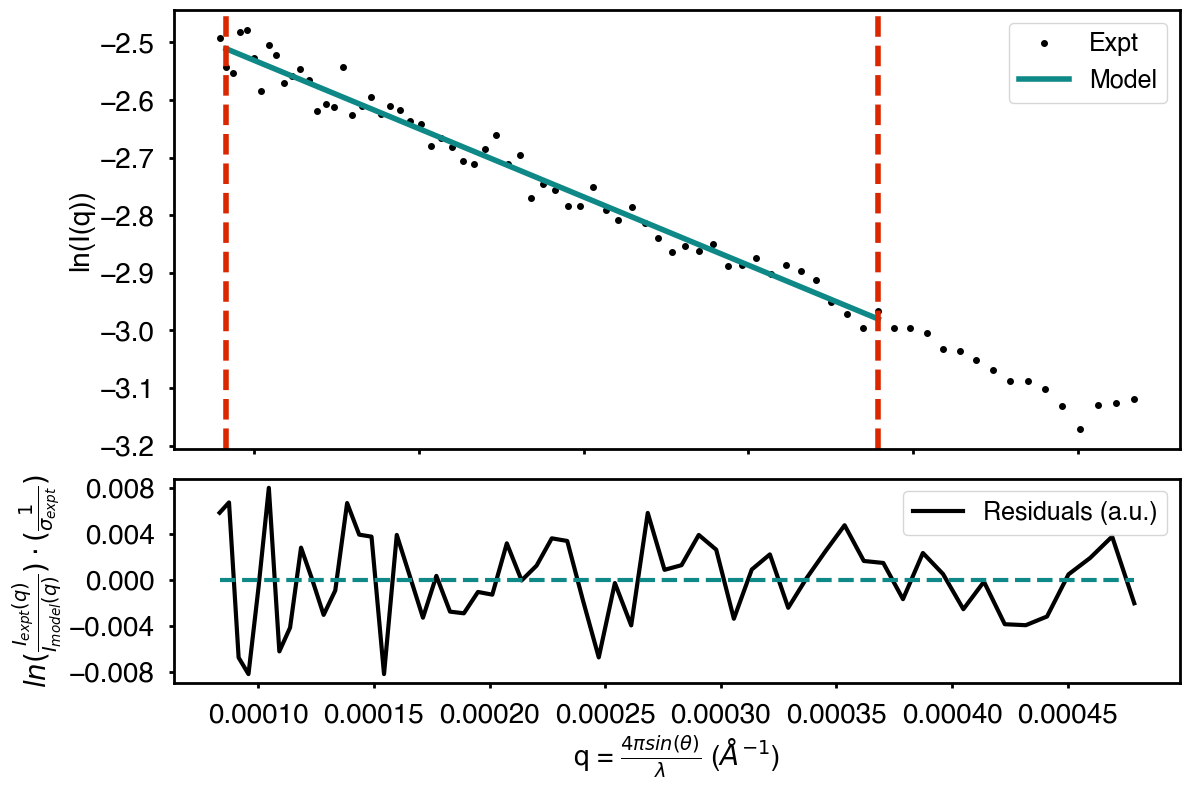

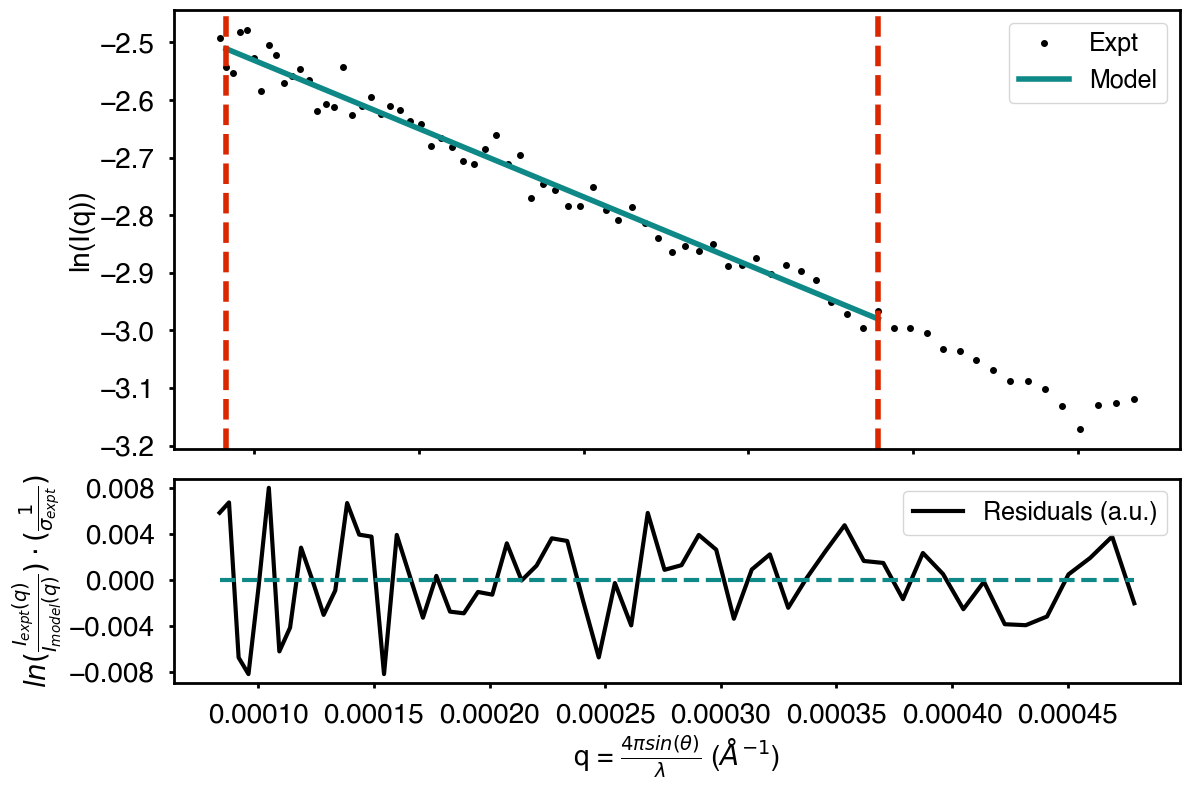

Acceptable fit? (Default: N)y


In [11]:
#######################################################
# Guiner - Manual - Rerun 
#######################################################
# Build plotting function..

%matplotlib inline
import pylab as pl
from IPython import display

def vertical_stackPlot_Guiner(X1=[],Y1=[],Y1err=[],X2=[],Y2=[],idxmin=0,idxmax=50,
                              ylabel1='No label provided',
                              ylabel2='No label provided',xlabel='No label provided',
                              Label1='',
                              Label2='',
                              saveLabel='Vertical_Residuals',
                              bottomPlot_yLabel='$ln(\\frac{I_{expt}(q)}{I_{model}(q)}) \cdot (\\frac{1}{\sigma_{expt}})$',
                              LinLin=True,
                              linewidth=4,
                              labelSize=20,
                              darkmode=False,
                              plot=True):
        '''
        X1: q
        X2: q
        Y1: Raw Data
        Y1err:
        Y2: Model
        ylabel1:
        ylabel2:
        xlabel:
        Label1:
        Label2:
        saveLabel:
        bottomPlot_yLabel:


        Second plot is a residual plot, therefore X2/Y2 should be the model.. Also, X1 must = x2
        '''

        # Plotting around the Guiner region for visualization

        Y1_org=np.log(Y1[idxmin:idxmax])
        Y1err_org=np.log(Y1err[idxmin:idxmax])
        # X1=X1[idxmin:idxmax]**2
        X1_org=X2[idxmin:idxmax]**2
        X2=X2[idxmin:idxmax]**2
        # Y2=Y2[idxmin:idxmax]

        if idxmin >= 15 and idxmax <= len(Y1)-15:
            X1=X1[idxmin-15:idxmax+15]**2
            Y1=np.log(Y1[idxmin-15:idxmax+15])
            Y1err=np.log(Y1err[idxmin-15:idxmax+15])
        elif idxmin <= 15 and idxmax <= len(Y1)-15:
            X1=X1[0:idxmax+15]**2
            Y1=np.log(Y1[0:idxmax+15])
            Y1err=np.log(Y1err[0:idxmax+15])

        if darkmode==True:
            plt.style.use('dark_background')
            c1='#D2700F'
            c2='#22A2AA'
        else:
            mpl.rcParams.update(mpl.rcParamsDefault)
            c1='k'
            c2='#0E8987'

        plt.rcParams['xtick.major.pad'] = 10
        plt.rcParams['ytick.major.pad'] = 10
        plt.rcParams['axes.linewidth'] = 2
        # plt.rcParams["figure.figsize"] = (20,10)
        fg = plt.figure(figsize=(12,8))
        ax = plt.subplot2grid((3,3),(0,0),rowspan=2,colspan=3)
        ax2 = plt.subplot2grid((3,3),(2,0),rowspan=1,colspan=3)
        plt.rc("axes",linewidth=linewidth)
        plt.rc('font',**{"sans-serif":["Helvetica"]})
        
        pl.plot(X1,Y1,
                color=c1,
                marker='o',
                markersize=linewidth,
                linestyle='None',
                label=Label1)
        pl.plot(X2,Y2,
                color=c2,
                linestyle='-',
                linewidth=linewidth,
                label=Label2)

        ax.axvline(x=X2[0],
            linestyle='--',
            linewidth=4,
            color='#DA2700')
        ax.axvline(x=X2[-1],
            linestyle='--',
            linewidth=4,
            color='#DA2700')
        ax.set_ylabel(ylabel1,size=labelSize)
        ax.legend(numpoints=1,fontsize=18,loc="best")
        ax.xaxis.set_tick_params(which='both',width=2)
        ax.set_xticklabels([])
        ax.yaxis.set_tick_params(which='both',width=2)
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(labelSize)
            tick.label1.set_fontname('Helvetica')
        ax2.plot(X1_org,((Y1_org - Y2)) / ((Y1err_org)),
                 color=c1,
                 linestyle='-',
                 linewidth=linewidth-1,
                 label=ylabel2)
        ax2.plot(X1_org,[0] * len(Y1_org),
                 color=c2,
                 linestyle='--',
                 linewidth=linewidth-1)
        ax2.set_xlabel(xlabel,size=labelSize) # 'q = $\\frac{4 \pi sin(\\theta)}{\\lambda}$ ($\\AA^{-1}$)'
        ax2.set_ylabel(bottomPlot_yLabel,size=labelSize)
        # $\\frac{\\frac{ln(I_{expt}(q))}{ln(I_{model}(q))}}{\sigma_{expt}}$
        # \\frac{ln(I_{expt}(q))}{ln(I_{model}(q))} \cdot \\frac{1}{\sigma_{expt}}
        ax2.legend(numpoints=1,fontsize=18,loc="best")
        # ax2.set_xlim(q[nmin],0.71)
        # ax.set_ylim(0.01,0.025)
        ax2.xaxis.set_tick_params(which='both',width=2)
        ax2.yaxis.set_tick_params(which='both',width=2)
        for tick in ax2.xaxis.get_major_ticks():
            tick.label1.set_fontsize(labelSize)
            tick.label1.set_fontname('Helvetica')
        for tick in ax2.yaxis.get_major_ticks():
            tick.label1.set_fontsize(labelSize)
            tick.label1.set_fontname('Helvetica')
        ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
        fg.tight_layout()
        plt.savefig(saveLabel + 'VerticalStack_plot.png',
                    format='png',dpi=500,bbox_inches='tight')
        if plot==True:
            display.clear_output(wait=True)
            display.display(pl.gcf())

#######################################################

from IPython.display import clear_output
print('################################################################')

man_Guiner_option=input('Do you want to run a manual Guiner fit? (Default: N) ')
if man_Guiner_option=='Y' or man_Guiner_option=='y':
	man_Guiner_option=True
elif man_Guiner_option=='N' or man_Guiner_option=='n':
	man_Guiner_option=False
elif man_Guiner_option=='':
	man_Guiner_option=False

if man_Guiner_option == True:
	print('Downstream analysis will use results from manual Guiner analysis!')
	man_Guiner_diction={}

accept=False

if man_Guiner_option == True:
    for i,j in zip(dat_files,fileList):
        accept=False
        while accept==False:
            try:
                print('################################################################')
                print(j, 'Processing ....')
                
                man_Guiner_nmin=int(input('Guiner nmin? '))
                man_Guiner_nmax=int(input('Guiner nmax? '))
                
                hbI0,hbRg,hbRg_Err,hb_qminRg,hb_qmaxRg,model=calcs.Guiner_Error(dat_files[str(i)]['Q'],
                                                                                 dat_files[str(i)]['I(Q)'],
                                                                                 dat_files[str(i)]['ERROR'],
                                                                                 file='%s_Manual_Guiner'%str(i),
                                                                                 nmin=man_Guiner_nmin,
                                                                                 nmax=man_Guiner_nmax,
                                                                                 savelabel='%s_Manual_Guiner'%str(j),
                                                                                 darkmode=False)
                
                man_Guiner_diction['%s_I0'%str(j)]=hbI0
                man_Guiner_diction['%s_Rg'%str(j)]=hbRg
                man_Guiner_diction['%s_Rg_Err'%str(j)]=hbRg_Err
                man_Guiner_diction['%s_qminRg'%str(j)]=hb_qminRg
                man_Guiner_diction['%s_qmaxRg'%str(j)]=hb_qmaxRg
                man_Guiner_diction['%s_Model'%str(j)]=model
                
                del hbI0,hbRg,hbRg_Err,hb_qminRg,hb_qmaxRg,model
                
                try_again=input('Acceptable fit? (Default: N)')
                if try_again=='y' or 'yes' or 'Y' or 'Yes' or 'YES':
                    accept=True
                    clear_output(wait=True)
                else:
                    clear_output(wait=True) # how to only clear most recent output? or do one file per cell?
            except Exception as e:
                print('An error arised during the computation..\nTry again!')
                print('The error was: ', e)
else:
    print('Manually Guiner Aborted... Continuing with downstream analysis')
    
    


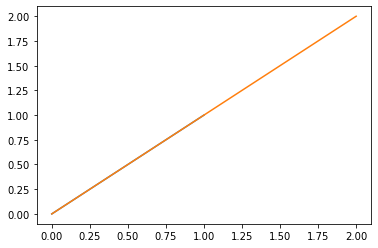

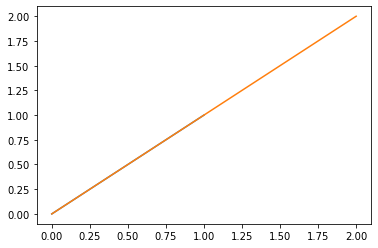

good?y


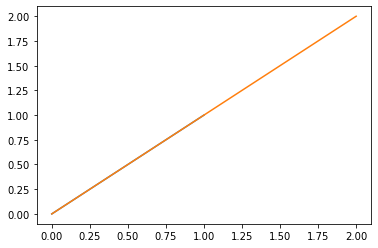

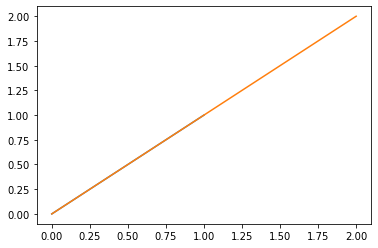

In [23]:
%matplotlib inline
import time
import pylab as pl
from IPython import display
x=False

while x==False:
    nmin=int(input('nmin'))
    nmax=int(input('nmax'))
    
    dep=np.linspace(0,nmin,10)
    ind=np.linspace(0,nmax,10)
    
    pl.plot(dep,ind)
    display.clear_output(wait=True)
    display.display(pl.gcf())
    acceptable=input('good?')
    if acceptable=='y':
        x=True

-------> Kratky plot - Unscaled
Data was truncated at q=0.25 inverse angstroms
-------> Kratky plot - Unscaled
Data was truncated at q=0.25 inverse angstroms


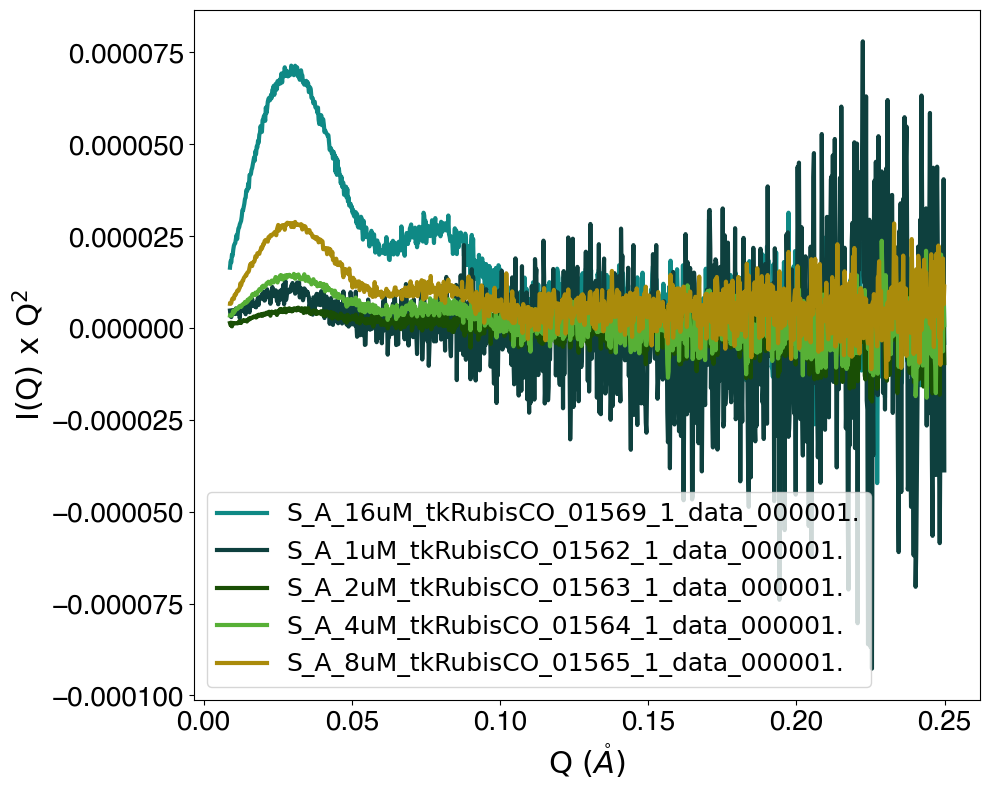

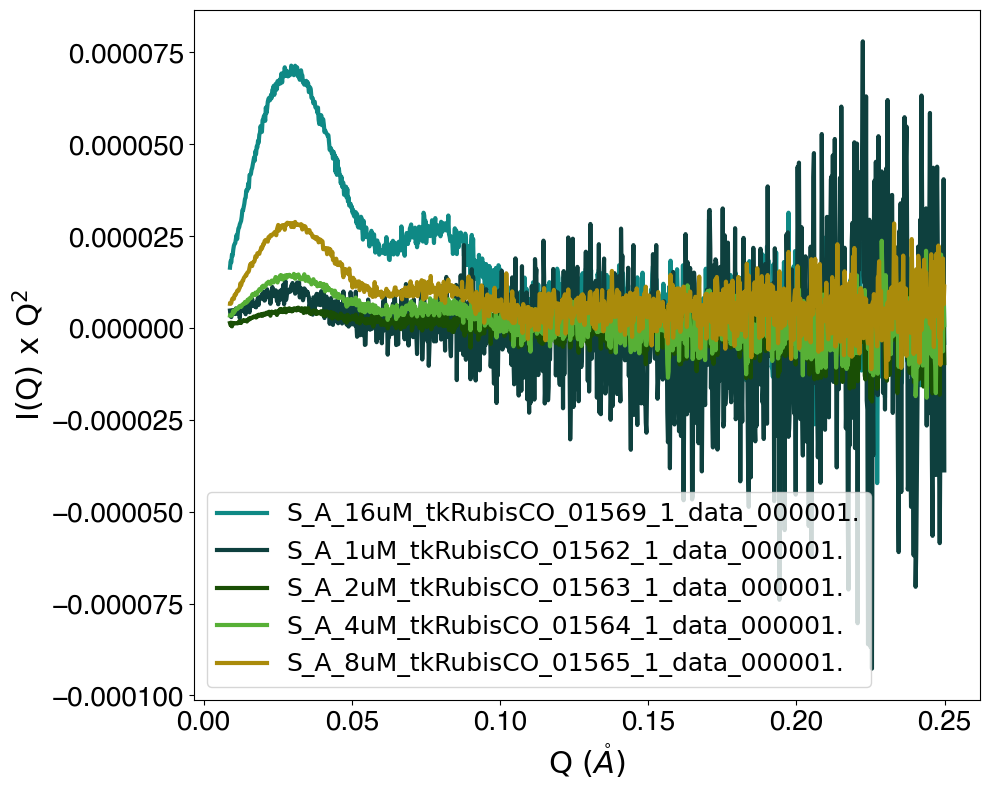

-------> Kratky plot - Unscaled
Data was truncated at q=0.15 inverse angstroms
-------> Kratky plot - Unscaled
Data was truncated at q=0.15 inverse angstroms


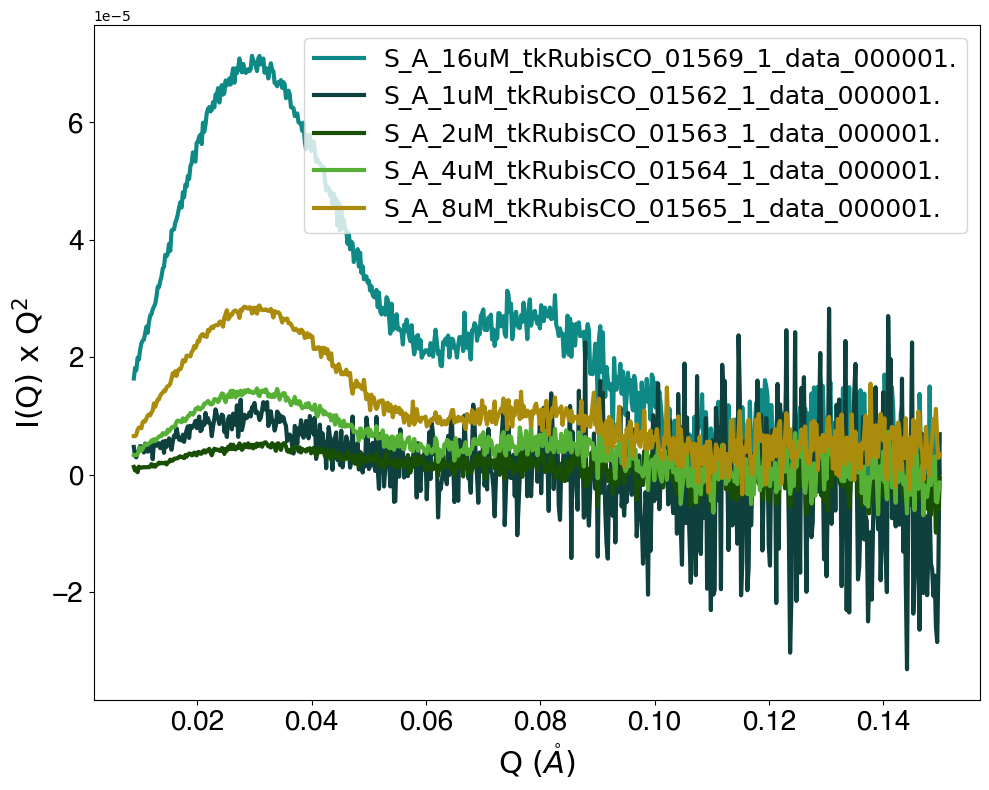

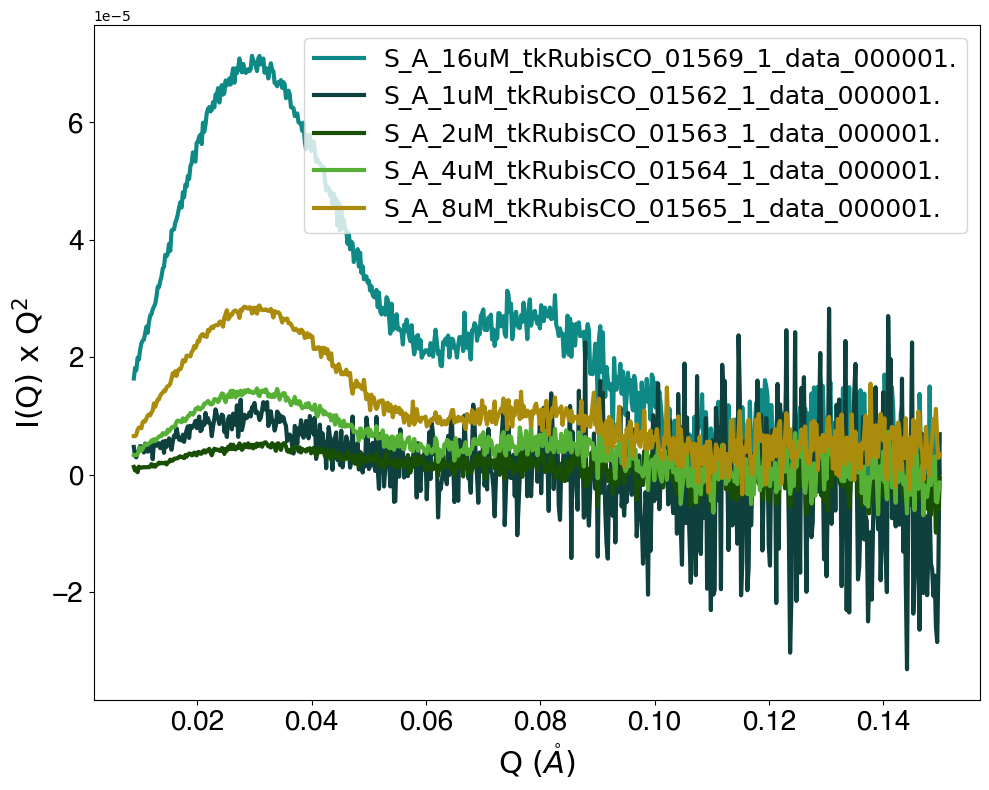

In [12]:
# Generate Kratky

ref_q = dat_files['data_1']['Q']
ref_I = dat_files['data_1']['I(Q)']
plotlabel=fileList[0]


# Generate list for rest of files
plotList=[]
for i in islice(dat_files, 1, None): # skips first value in the list via islice()
    plotList.append([dat_files[str(i)]['Q'],dat_files[str(i)]['I(Q)']])
    
plotListLabels=[]
for j in islice(fileList,1,None):
    plotListLabels.append(j)
    
    
# Actually make some plots
figs.kratkyPlot(ref_q=ref_q,ref_i=ref_I,
                plotList=plotList,plotListLabels=plotListLabels,xlabel='Q ($\mathring{A}$)',
                ylabel='I(Q) x Q$^{2}$',scaled=False,
                plotlabel='%s'%str(plotlabel),linewidth=3,savelabel='Combined_Kratky',
                truncation_q=0.25,darkmode=False)


figs.kratkyPlot(ref_q=ref_q,ref_i=ref_I,
                plotList=plotList,plotListLabels=plotListLabels,xlabel='Q ($\mathring{A}$)',
                ylabel='I(Q) x Q$^{2}$',scaled=False,
                plotlabel='%s'%str(plotlabel),linewidth=3,savelabel='Combined_Kratky',
                truncation_q=0.15,darkmode=False)

In [13]:
#######################################################
# DATGNOM

# Note: DATGNOM has an AutoRg function built into it..
# BUT we will just provide an Rg as input as well
#######################################################

# If manual Guiner was used, utilize those results!
c=0
for i,j in zip(dat_files,fileList):
	try:
		# print('Manual Guiner was used..')
		man_Guiner_diction['%s_I0'%str(j)]
		man_Guiner=True
		print('---> Using manual Guiner fit values for input parameters in downstream analysis')
	except NameError:
		print('---> Using AutoRg fit values for input parameters in downstream analysis')
		man_Guiner=False
		# man_Guiner_diction['%s_I0'%str(j)] = None
	c+=1
	if c >= 1: # only need to check if it exists for one data file (b/c then it exists for ALL data files!)
		break

print('\n\n')

# Assign variables based on whether or not AutoRg is being used or Manual Guiner fit

if man_Guiner==False:
	for i in dat_files:
		Rg=auto_Guiner_diction['%s_Rg'%str(j)]
		Rg_Err=auto_Guiner_diction['%s_Rg_Err'%str(j)]
		I0=auto_Guiner_diction['%s_I0'%str(j)]
		I0_Err=auto_Guiner_diction['%s_I0_Err'%str(j)]
		idx_min=auto_Guiner_diction['%s_idx_min'%str(j)]
		idx_max=auto_Guiner_diction['%s_idx_max'%str(j)]

		# print(idx_min, idx_max)
else:
	for i in dat_files:
		Rg=man_Guiner_diction['%s_Rg'%str(j)]
		Rg_Err=man_Guiner_diction['%s_Rg_Err'%str(j)]
		I0=man_Guiner_diction['%s_I0'%str(j)]
		qmin_Rg=man_Guiner_diction['%s_qminRg'%str(j)]
		qmin=man_Guiner_diction['%s_qminRg'%str(j)]/man_Guiner_diction['%s_Rg'%str(j)]
		qmax_Rg=man_Guiner_diction['%s_qmaxRg'%str(j)]
		qmax=man_Guiner_diction['%s_qmaxRg'%str(j)]/man_Guiner_diction['%s_Rg'%str(j)]
		model=man_Guiner_diction['%s_Model'%str(j)]
		idx_min=man_Guiner_nmin
		idx_max=man_Guiner_nmax


# Run DATGNOM calculation

datGNOM_diction={}
path_prefix=os.getcwd()
# print('%s'%str(path_prefix) + '/')

for i,j in zip(dat_files,fileList):
	datGNOM_diction['%s_IFTM'%str(j)],datGNOM_diction['%s_DATGNOM_Dictionary'%str(j)] = calcs.runDatgnom(
		file_path='%s'%str(path_prefix) + '/' +'%s'%str(j),
		save_path='%s'%str(path_prefix) + '/',outname='%s_DATGNOM_PDDF'%str(j),first_pt=None,
		lowclip=idx_min,rg=Rg,plot=True)

KeyError: 'S_A_16uM_tkRubisCO_01569_1_data_000001._I0'

KeyError: 'S_A_16uM_tkRubisCO_01569_1_data_000001._I0'

In [ ]:
#######################################################
# Manual GNOM


#######################################################


man_GNOM = input('Do you want to run GNOM with manual inputs? (Default: Y)')
if man_GNOM=='Y' or man_GNOM=='y' or man_GNOM=='Yes' or man_GNOM=='yes':
	man_GNOM=True
elif man_GNOM=='N' or man_GNOM=='n':
	man_GNOM=False
elif man_GNOM=='':
	man_GNOM=True

    
if man_GNOM==True:
    man_GNOM_plot = input('Do you want to suppress the plot output? (Default: N)')
    if man_GNOM_plot=='Y' or man_GNOM_plot=='y' or man_GNOM_plot=='Yes' or man_GNOM_plot=='yes':
        man_GNOM_plot=False
    elif man_GNOM_plot=='N' or man_GNOM_plot=='n':
        man_GNOM_plot=True
    elif man_GNOM_plot=='':
        man_GNOM_plot=True



if man_GNOM == True:

	man_GNOM_diction={}

	for i,j in zip(dat_files,fileList):


		man_GNOM_nmin=input('Do you want to use default nmin from Guiner analysis for file: %s (%s)? (Default: Y)'%(str(j),str(i)))
		if man_GNOM_nmin=='Y' or man_GNOM_nmin=='y' or man_GNOM_nmin=='Yes' or man_GNOM_nmin=='yes':
			man_GNOM_nmin=True
		elif man_GNOM_nmin=='N' or man_GNOM_nmin=='n':
			man_GNOM_nmin=False
		elif man_GNOM_nmin=='':
			man_GNOM_nmin=True

		if man_GNOM_nmin == False:
			nmin_GNOM=int(input('Alright. How many points do you want to remove from the low-q? '))
		else:
			print('Default nmin from Guiner analysis: %s'%str(idx_min))
			nmin_GNOM=int(idx_min)


		man_GNOM_rmax = input('What is the Dmax for file: %s (%s)? (A) (Default: 150) '%(str(j),str(i)))

		if man_GNOM_rmax == '':
			man_GNOM_rmax=150
		else:
			man_GNOM_rmax=int(man_GNOM_rmax)

		man_GNOM_rmin0=input('Do you want to force rmin to zero for file: %s (%s)? (Default: Y)'%(str(j),str(i)))
		if man_GNOM_rmin0=='Y' or man_GNOM_rmin0=='y' or man_GNOM_rmin0=='Yes' or man_GNOM_rmin0=='yes':
			man_GNOM_rmin0=True
		elif man_GNOM_rmin0=='N' or man_GNOM_rmin0=='n':
			man_GNOM_rmin0=False
		elif man_GNOM_rmin0=='':
			man_GNOM_rmin0=True

		if man_GNOM_rmin0==True:
			rmin0='yes'
		else:
			rmin0='no'

		print('%s'%str(path_prefix) + '/' +'%s'%str(j))
		man_GNOM_diction['%s_man_GNOM'] = calcs.runGNOM(
			file_path='%s'%str(path_prefix) + '/' +'%s'%str(j),
			output_name='%s_man_GNOM_PDDF'%str(i),
			gnom_nmin=nmin_GNOM,
			force_zero_rmin=rmin0,
			rmax=man_GNOM_rmax,
			plot=man_GNOM_plot
			)

In [ ]:
print('Plot Rg and I0 as a function of file')

In [ ]:
# print(dat_files)

try: # does the dictionary exist
    man_Guiner_diction
except NameError:
    man_Guiner_diction = None

# if man_Guiner_diction == None:
#     print('No Manual Guiner Available..')

if man_Guiner_diction is not None:
    rgs=[]
    labelList=[]
    for i,j in zip(dat_files,fileList):
        rgs.append(man_Guiner_diction['%s_Rg'%str(j)])
#         labelList.append('%s'%str(fileList))
    X=[str(x) for x in range(1,len(rgs) + 1)]

if man_Guiner_diction is not None:
    figs.basicPointPlot(X,rgs,plotlabel='Guiner_RgvsFile',savelabel='RgvsFile',
                   xlabel='File No.',ylabel='Rg')

if man_Guiner_diction is not None:
    I0s=[]
    labelList=[]
    for i,j in zip(dat_files,fileList):
        I0s.append(man_Guiner_diction['%s_I0'%str(j)])
#         labelList.append('%s'%str(fileList))
#     X=[str(x) for x in range(1,len(I0s) + 1)]

if man_Guiner_diction is not None:
    figs.basicPointPlot(X,I0s,plotlabel='Guiner_I0vsFile',savelabel='I0vsFile',
                   xlabel='File No.',ylabel='I0')
        
        
if man_Guiner_diction == None:
    print('Using AutoRg results...')

In [ ]:
# from colour import Color
# red = Color("red")
# colors = list(red.range_to(Color("green"),len(labelList)))
# print(colors[1])

for i,j in zip(dat_files,fileList):
    n=len(dat_files[str(i)]['ERROR']) # scale the size of the profile for downstream residuals calculations
    cmd = 'crysol highres_structures/TkRubisCO/3A12_L10.pdb %s -lm 50 -sm 0.3 -kp=ii -p %s'%(str(j),str(j))
    proc = subprocess.Popen([cmd], stdout=subprocess.PIPE, shell=True)
    (out, err) = proc.communicate()


# filename='S_A_1uM_tkRubisCO_01562_1_data_000001.dat.log'

crysol_List=[]
for i in fileList:
    crysol_List.append(i + '.log')

    
crysol_fits = []
for k in fileList:
    crysol_fits.append(k+'.fit')

crysol_files = tmp_data.load_fitFiles(fileList=crysol_fits)
    
for fn,k,z in zip(crysol_List,crysol_files,fileList):
    crysol_parse=[]
    crysol_parse2=[]
    with open(fn, "r") as f: # important to use with command when dealing with files
        counter = 0
        print('File: %s' %str(z))
        c=0
        for line in f:
            c+=1
            if 'Chi^2' in line:
                crysol_parse.append(''.join(islice(f, 1)))
            if 'Rg from the slope of net intensity' in line:
                print(line)
                crysol_parse2.append(line)
    
    Rg=[i for j in crysol_parse2[0].split() for i in (j, ' ')][:-1][18]
    print('Final Rg (A): ', Rg)
    chi_sq=[i for j in crysol_parse[0].split() for i in (j, ' ')][:-1][18]
    print('Chi-Squared: ',chi_sq)

    
    pairList=[[crysol_files[str(k)]['Q'],crysol_files[str(k)]['I(Q)']],
              [crysol_files[str(k)]['Q'],crysol_files[str(k)]['I(Q)_mod']]]
    

    labelList=['%s'%str(z),'Model']

    colorList=['#9B9B9B','#00B2AF']

#     figs.nPlot_variX_and_Color(pairList=pairList,labelList=labelList,colorList=colorList,
#                               xlabel='q ($\\AA^{-1}$)',
#                               ylabel='Intensity, I(Q)',
#                               savelabel='%s_crysol'%str(z))

    X1=crysol_files[str(k)]['Q']
    Y1=crysol_files[str(k)]['I(Q)']
    X2=crysol_files[str(k)]['Q']
    Y2=crysol_files[str(k)]['I(Q)_mod']
    Y1err=[1] * len(X1)
    
    skip=next((i for i, x in enumerate(Y1) if x), None) # x!= 0 for strict match

    figs.vertical_stackPlot(X1=X1[skip:],Y1=Y1[skip:],Y1err=Y1err[skip:],X2=X2[skip:],Y2=Y2[skip:],ylabel1='Intensity, I(Q)',
                            ylabel2='Residuals',xlabel='Q ($\mathring{A}^{-1}$)',
                            Label1='%s'%z, Label2='Crysol Model',saveLabel='Vertical_Residuals_Crysol_fit',
                            bottomPlot_yLabel='$ln(\\frac{I_{expt}(q)}{I_{model}(q)}) \cdot (\\frac{1}{\sigma_{expt}})$',
                            LinLin=False,
                            linewidth=4,labelSize=20,darkmode=False,plot=True)




    
# Residuals plot is challenging because there is not the same number of points in the profile as there is in the
# Raw data... I think I can fix this!

# X1=dat_files['data_1']['Q']
# Y1=dat_files['data_1']['I(Q)']
# for i in dat_files:
#     print('TEST!!!!')
#     print(len(dat_files[str(i)]['ERROR']))

# n=0
# for k,z in zip(crysol_files,fileList):
#     X1=crysol_files[str(k)]['Q']
#     Y1=crysol_files[str(k)]['I(Q)']
#     X2=crysol_files[str(k)]['Q']
#     Y2=crysol_files[str(k)]['I(Q)_mod']
# #     n+=1
# #     if n>=1:
# #         break

#     Y1err=[1] * len(X1)

#     figs.vertical_stackPlot(X1=X1,Y1=Y1,Y1err=Y1err,X2=X2,Y2=Y2,ylabel1='Intensity, I(Q)',
#                             ylabel2='Residuals',xlabel='Q ($\mathring{A}^{-1}$)',
#                             Label1='%s'%z, Label2='Crysol Model',saveLabel='Vertical_Residuals_Crysol_fit',
#                             bottomPlot_yLabel='$ln(\\frac{I_{expt}(q)}{I_{model}(q)}) \cdot (\\frac{1}{\sigma_{expt}})$',
#                             LinLin=False,
#                             linewidth=4,labelSize=20,darkmode=False,plot=True)




In [ ]:
for i,j in zip(dat_files,fileList):
    n=len(dat_files[str(i)]['ERROR']) # scale the size of the profile for downstream residuals calculations
    cmd = 'crysol highres_structures/TkRubisCO/J93_10mer.pdb %s -lm 50 -sm 0.3 -kp=ii -p %s'%(str(j),str(j))
    proc = subprocess.Popen([cmd], stdout=subprocess.PIPE, shell=True)
    (out, err) = proc.communicate()


# filename='S_A_1uM_tkRubisCO_01562_1_data_000001.dat.log'

crysol_List=[]
for i in fileList:
    crysol_List.append(i + '.log')

    
crysol_fits = []
for k in fileList:
    crysol_fits.append(k+'.fit')

crysol_files = tmp_data.load_fitFiles(fileList=crysol_fits)
    
for fn,k,z in zip(crysol_List,crysol_files,fileList):
    crysol_parse=[]
    crysol_parse2=[]
    with open(fn, "r") as f: # important to use with command when dealing with files
        counter = 0
        print('File: %s' %str(z))
        c=0
        for line in f:
            c+=1
            if 'Chi^2' in line:
                crysol_parse.append(''.join(islice(f, 1)))
            if 'Rg from the slope of net intensity' in line:
                print(line)
                crysol_parse2.append(line)
    
    Rg=[i for j in crysol_parse2[0].split() for i in (j, ' ')][:-1][18]
    print('Final Rg (A): ', Rg)
    chi_sq=[i for j in crysol_parse[0].split() for i in (j, ' ')][:-1][18]
    print('Chi-Squared: ',chi_sq)

    
    pairList=[[crysol_files[str(k)]['Q'],crysol_files[str(k)]['I(Q)']],
              [crysol_files[str(k)]['Q'],crysol_files[str(k)]['I(Q)_mod']]]
    

    labelList=['%s'%str(z),'Model']

    colorList=['#9B9B9B','#00B2AF']

#     figs.nPlot_variX_and_Color(pairList=pairList,labelList=labelList,colorList=colorList,
#                               xlabel='q ($\\AA^{-1}$)',
#                               ylabel='Intensity, I(Q)',
#                               savelabel='%s_crysol'%str(z))

    X1=crysol_files[str(k)]['Q']
    Y1=crysol_files[str(k)]['I(Q)']
    X2=crysol_files[str(k)]['Q']
    Y2=crysol_files[str(k)]['I(Q)_mod']
    Y1err=[1] * len(X1)
    
    skip=next((i for i, x in enumerate(Y1) if x), None) # x!= 0 for strict match

    figs.vertical_stackPlot(X1=X1[skip:],Y1=Y1[skip:],Y1err=Y1err[skip:],X2=X2[skip:],Y2=Y2[skip:],ylabel1='Intensity, I(Q)',
                            ylabel2='Residuals',xlabel='Q ($\mathring{A}^{-1}$)',
                            Label1='%s'%z, Label2='Crysol Model',saveLabel='Vertical_Residuals_Crysol_fit',
                            bottomPlot_yLabel='$ln(\\frac{I_{expt}(q)}{I_{model}(q)}) \cdot (\\frac{1}{\sigma_{expt}})$',
                            LinLin=False,
                            linewidth=4,labelSize=20,darkmode=False,plot=True)




    
# Residuals plot is challenging because there is not the same number of points in the profile as there is in the
# Raw data... I think I can fix this!

# X1=dat_files['data_1']['Q']
# Y1=dat_files['data_1']['I(Q)']
# for i in dat_files:
#     print('TEST!!!!')
#     print(len(dat_files[str(i)]['ERROR']))

# n=0
# for k,z in zip(crysol_files,fileList):
#     X1=crysol_files[str(k)]['Q']
#     Y1=crysol_files[str(k)]['I(Q)']
#     X2=crysol_files[str(k)]['Q']
#     Y2=crysol_files[str(k)]['I(Q)_mod']
# #     n+=1
# #     if n>=1:
# #         break

#     Y1err=[1] * len(X1)

#     figs.vertical_stackPlot(X1=X1,Y1=Y1,Y1err=Y1err,X2=X2,Y2=Y2,ylabel1='Intensity, I(Q)',
#                             ylabel2='Residuals',xlabel='Q ($\mathring{A}^{-1}$)',
#                             Label1='%s'%z, Label2='Crysol Model',saveLabel='Vertical_Residuals_Crysol_fit',
#                             bottomPlot_yLabel='$ln(\\frac{I_{expt}(q)}{I_{model}(q)}) \cdot (\\frac{1}{\sigma_{expt}})$',
#                             LinLin=False,
#                             linewidth=4,labelSize=20,darkmode=False,plot=True)





In [ ]:
print('Exporting data....')

In [ ]:
## Need to deal with data upstream...
import csv
print('Exporting all dictionaries as CSV files')
print('Therefore, the data is permenantly recorded and easily shareable.')

# AutoRg Data
with open('Auto_Guiner_Dictionary.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f, auto_Guiner_diction.keys())
    w.writeheader()
    w.writerow(auto_Guiner_diction)    
    
# Manual Rg Data
if man_Guiner_diction:
    with open('Manual_Guiner_Dictionary.csv', 'w') as f:  # Just use 'w' mode in 3.x
        w = csv.DictWriter(f, man_Guiner_diction.keys())
        w.writeheader()
        w.writerow(man_Guiner_diction)

# DATGNOM Data
with open('DATGNOM_Dictionary.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f, datGNOM_diction.keys())
    w.writeheader()
    w.writerow(datGNOM_diction)

    
# Manual Rg Data
try:
    man_GNOM_diction
except NameError:
    man_GNOM_diction = None

if man_GNOM_diction is not None:
    with open('Manual_GNOM_Dictionary.csv', 'w') as f:  # Just use 'w' mode in 3.x
        w = csv.DictWriter(f, man_GNOM_diction.keys())
        w.writeheader()
        w.writerow(man_GNOM_diction)